# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

# **Import Dataset**

In [3]:
df_final=pd.read_csv('/content/drive/MyDrive/P4/df_final.csv',sep=",")
df_final

,OSEBuildingID,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log
0,1,Hotel,DOWNTOWN,89,1.0,12,88434,88434,88434.0,60.0,7.226362e+06,249.98,15.793246,5.521381
1,2,Hotel,DOWNTOWN,20,1.0,11,103566,88502,83880.0,61.0,8.387933e+06,295.86,15.942305,5.689886
2,3,Hotel,DOWNTOWN,47,1.0,41,956110,759392,756493.0,43.0,7.258702e+07,2089.28,18.100297,7.644575
3,5,Hotel,DOWNTOWN,90,1.0,10,61320,61320,61320.0,56.0,6.794584e+06,286.43,15.731636,5.657494
4,8,Hotel,DOWNTOWN,36,1.0,18,175580,113580,123445.0,75.0,1.417261e+07,505.01,16.466822,6.224578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,50069,Small- and Mid-Sized Office,GREATER DUWAMISH,87,1.0,2,24990,24990,24990.0,9.0,4.420650e+06,134.80,15.301797,4.903792
998,50081,K-12 School,GREATER DUWAMISH,1,1.0,3,45000,45000,45728.0,77.0,1.325973e+06,9.24,14.097657,2.223542
999,50210,Office,MAGNOLIA / QUEEN ANNE,64,1.0,1,13661,13661,13661.0,75.0,5.026677e+05,3.50,13.127685,1.252763
1000,50220,Office,SOUTHEAST,56,1.0,1,15398,15398,15398.0,93.0,3.878100e+05,7.79,12.868271,2.052841


# **3. Pre-Modelling**

In [4]:
#les émissions de CO2
target1 = ['TotalGHGEmissions_log']

#la consommation totale d’énergie
target2 = ['SiteEnergyUse(kBtu)_log']

## 3.1 Categorical Features

In [5]:
cols_cat = ['PrimaryPropertyType', 'Neighborhood']

In [6]:
for i in range(len(cols_cat)):
  x = df_final[cols_cat[i]].unique()
  print('Column', cols_cat[i], "contains: \n", x, "\n")

Column PrimaryPropertyType contains: 
 ['Hotel' 'Other' 'Small- and Mid-Sized Office' 'K-12 School'
 'Large Office' 'Senior Care Community' 'Medical Office' 'Retail Store'
 'Hospital' 'Residence Hall' 'Warehouse' 'Worship Facility'
 'Mixed Use Property' 'Supermarket / Grocery Store' 'Distribution Center'
 'Refrigerated Warehouse' 'Low-Rise Multifamily' 'Office'] 

Column Neighborhood contains: 
 ['DOWNTOWN' 'NORTHEAST' 'BALLARD' 'GREATER DUWAMISH' 'NORTHWEST'
 'LAKE UNION' 'MAGNOLIA / QUEEN ANNE' 'EAST' 'CENTRAL' 'SOUTHWEST'
 'SOUTHEAST' 'NORTH' 'DELRIDGE' 'Delridge' 'Ballard' 'Northwest' 'North'
 'Central'] 



### Neighborhood

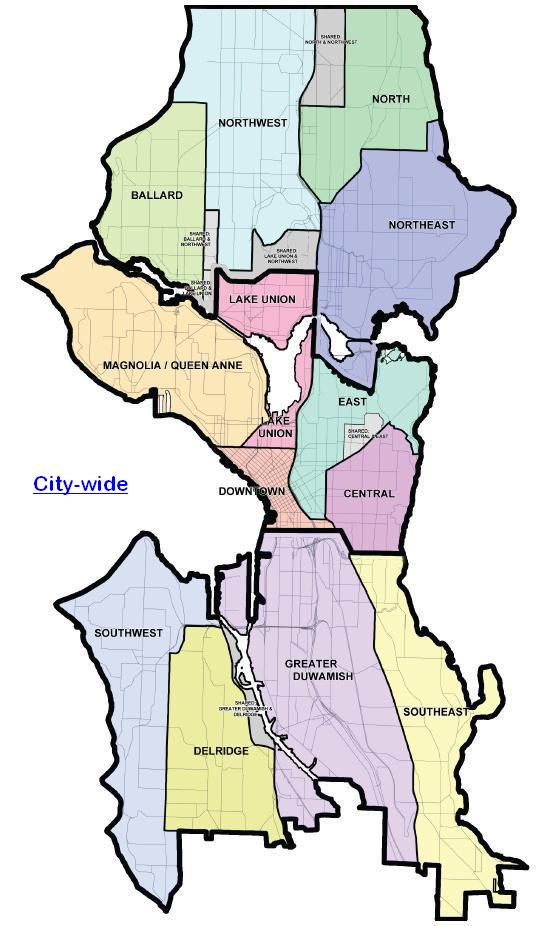

In [7]:
df_final['Neighborhood'] = df_final['Neighborhood'].str.upper()
df_final['Neighborhood'].unique()

array(['DOWNTOWN', 'NORTHEAST', 'BALLARD', 'GREATER DUWAMISH',
       'NORTHWEST', 'LAKE UNION', 'MAGNOLIA / QUEEN ANNE', 'EAST',
       'CENTRAL', 'SOUTHWEST', 'SOUTHEAST', 'NORTH', 'DELRIDGE'],
      dtype=object)

I divided Seattle into three parts:
* NORTH:'BALLARD', 'NORTHWEST', 'NORTH', 'NORTHEAST'.

* CENTRAL:'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'EAST', 'CENTRAL', 'DOWNTOWN'.

* SOUTH: 'SOUTHWEST', 'DELRIDGE', 'GREATER DUWAMISH', 'SOUTHEAST'.

In [8]:
REPLACEMENTS_Neighborhood = [
    ('BALLARD', "NORTH"),
    ('NORTHWEST', "NORTH"),
    ('NORTHEAST', "NORTH"),
    ('MAGNOLIA / QUEEN ANNE', "CENTRAL"),
    ('LAKE UNION', "CENTRAL"),
    ('EAST', "CENTRAL"),
    ('DOWNTOWN', "CENTRAL"),
    ('SOUTHWEST', "SOUTH"),
    ('DELRIDGE', "SOUTH"),
    ('GREATER DUWAMISH', "SOUTH"),
    ('SOUTHEAST', "SOUTH")
]

In [9]:
for old, new in REPLACEMENTS_Neighborhood:
    df_final['Neighborhood'] = df_final['Neighborhood'].replace(old, new)

df_final['Neighborhood'].unique()

array(['CENTRAL', 'NORTH', 'SOUTH'], dtype=object)

### PrimaryPropertyType

In [10]:
df_final[df_final['PrimaryPropertyType']=='Low-Rise Multifamily']

,OSEBuildingID,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log
422,19445,Low-Rise Multifamily,CENTRAL,16,1.0,3,93079,56986,91064.0,32.0,1997181.5,25.6,14.507247,3.242592


In [11]:
df_final[df_final['PrimaryPropertyType']=='Residence Hall']

,OSEBuildingID,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log
57,183,Residence Hall,CENTRAL,15,1.0,4,139600,102100,135520.0,89.0,4.448582e+06,129.39,15.308096,4.862831
81,294,Residence Hall,CENTRAL,103,1.0,9,107572,107572,63934.0,76.0,5.572503e+06,254.87,15.533355,5.540754
462,20029,Residence Hall,NORTH,95,1.0,3,21499,21499,21499.0,85.0,6.051307e+05,4.22,13.313200,1.439835
481,20273,Residence Hall,NORTH,23,1.0,3,28572,28572,22000.0,16.0,2.717863e+06,89.57,14.815357,4.495020
482,20323,Residence Hall,CENTRAL,34,0.0,15,115775,84240,150000.0,94.0,2.882490e+06,20.09,14.874165,3.000222
515,20861,Residence Hall,CENTRAL,28,1.0,3,21118,21118,21118.0,49.0,1.361428e+06,39.50,14.124045,3.676301
559,21262,Residence Hall,CENTRAL,107,1.0,4,29796,29796,29796.0,47.0,2.233262e+06,79.58,14.618974,4.376763
683,23297,Residence Hall,CENTRAL,112,1.0,1,44086,44086,44091.0,29.0,3.652709e+06,184.00,15.110980,5.214936
898,26906,Residence Hall,NORTH,87,1.0,3,22124,22124,22124.0,82.0,6.376850e+05,4.45,13.365600,1.492904
899,26909,Residence Hall,NORTH,90,1.0,3,27487,27487,27487.0,82.0,1.594505e+06,65.95,14.282074,4.188897


'Low-Rise Multifamily' and ''Residence Hall' are actually residential. Therefore, I deleted them from my table.

In [12]:
df_final = df_final.drop(df_final[(df_final['PrimaryPropertyType']=='Low-Rise Multifamily') | (df_final['PrimaryPropertyType']=='Residence Hall')].index)
df_final.reset_index(drop=True,inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              982 non-null    int64  
 1   PrimaryPropertyType        982 non-null    object 
 2   Neighborhood               982 non-null    object 
 3   BuildingAge                982 non-null    int64  
 4   NumberofBuildings          982 non-null    float64
 5   NumberofFloors             982 non-null    int64  
 6   PropertyGFATotal           982 non-null    int64  
 7   PropertyGFABuilding(s)     982 non-null    int64  
 8   LargestPropertyUseTypeGFA  982 non-null    float64
 9   ENERGYSTARScore            982 non-null    float64
 10  SiteEnergyUse(kBtu)        982 non-null    float64
 11  TotalGHGEmissions          982 non-null    float64
 12  SiteEnergyUse(kBtu)_log    982 non-null    float64
 13  TotalGHGEmissions_log      982 non-null    float64

In [13]:
df_final_groupby_sum = df_final.groupby(['PrimaryPropertyType'],as_index=False).sum().sort_values(by=['SiteEnergyUse(kBtu)'], ascending=False)
df_final_groupby_sum

<ipython-input-13-0a43e5ec5108>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final_groupby_sum = df_final.groupby(['PrimaryPropertyType'],as_index=False).sum().sort_values(by=['SiteEnergyUse(kBtu)'], ascending=False)


,PrimaryPropertyType,OSEBuildingID,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log
4,Large Office,679899,6379,164.0,2228,59425916,49088000,45162909.0,12562.0,2.779289e+09,32773.38,2665.065023,797.174357
1,Hospital,150730,409,43.0,69,6213004,6062549,6833275.0,481.0,1.415470e+09,50529.63,182.451224,77.730637
2,Hotel,593358,3651,72.0,681,10934957,9251214,9690831.0,4414.0,8.294449e+08,27025.79,1132.898496,380.841429
12,Small- and Mid-Sized Office,4105664,14835,230.0,787,11007821,9999224,9392528.0,15931.0,6.078209e+08,9196.69,3420.016631,757.221046
5,Medical Office,465863,1527,35.0,167,6224678,4521250,4281743.0,1610.0,4.593048e+08,10163.33,579.666674,165.829336
8,Other,165775,637,11.0,76,1388493,1353373,1091035.0,686.0,4.104197e+08,3943.20,174.085721,47.953594
13,Supermarket / Grocery Store,784782,1274,36.0,56,2238265,1925772,1858092.0,1809.0,3.782491e+08,8499.54,609.473126,198.484846
10,Retail Store,1227682,4447,76.0,151,6118294,5940829,5128813.0,5325.0,3.769546e+08,7182.41,1150.816145,285.734616
6,Mixed Use Property,369308,1213,23.0,150,5169882,4211862,2195963.0,1603.0,3.058790e+08,3605.02,384.173319,100.611681
14,Warehouse,2336001,7899,142.0,230,9143280,9124439,8753847.0,7721.0,2.586972e+08,6165.53,1997.167605,423.344280


In [14]:
cols_target =['SiteEnergyUse(kBtu)','TotalGHGEmissions']

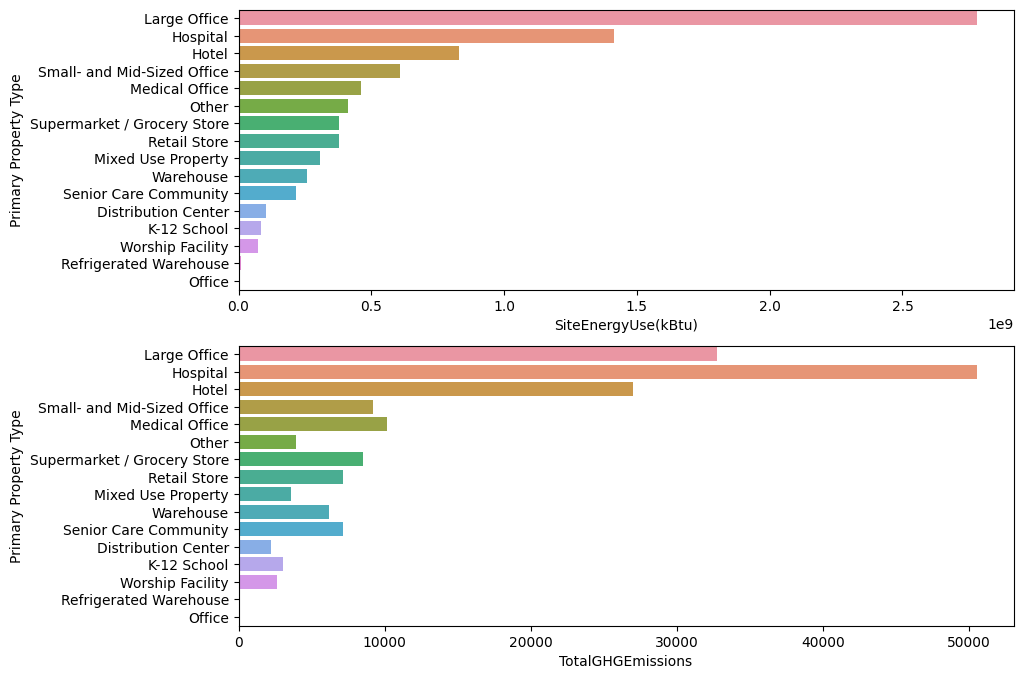

In [15]:
plt.figure(figsize=(10,8))
for i in range (len(cols_target)):
  plt.subplot(len(cols_target),1, i + 1)
  sns.barplot(data=df_final_groupby_sum, x=cols_target[i], y='PrimaryPropertyType')
  plt.xlabel(cols_target[i])
  plt.ylabel('Primary Property Type')
plt.show()

In the column **"PrimaryPropertyType"** there are many categories, here I cluster them into the following categories by their energy consumption:

* PPT_1: 'Large Office', 'Hospital'.

* PPT_2: 'Hotel', 'Small- and Mid-Sized Office'.

* PPT_3: 'Medical Office', 'Other', 'Supermarket / Grocery Store', 'Retail Store'.  

* PPT_4:  'Mixed Use Property', 'Warehouse', 'Senior Care Community', 'Distribution Center'.

* PPT_5: 'K-12 School', 'Worship Facility'.

* PPT_6: 'Refrigerated Warehouse', 'Office'.

In [16]:
REPLACEMENTS_PPT = [
    ('Large Office', "PPT_1"),
    ('Hospital', "PPT_1"),
    ('Hotel', "PPT_2"),
    ('Small- and Mid-Sized Office', "PPT_2"),
    ('Medical Office', "PPT_3"),
    ('Other', "PPT_3"),
    ('Supermarket / Grocery Store', "PPT_3"),
    ('Retail Store', "PPT_3"),
    ('Mixed Use Property', "PPT_4"),
    ('Warehouse', "PPT_4"),
    ('Senior Care Community', "PPT_4"),
    ('Distribution Center', "PPT_4"),
    ('K-12 School', "PPT_5"),
    ('Worship Facility', "PPT_5"),
    ('Refrigerated Warehouse', "PPT_6"),
    ('Office', "PPT_6")
]

In [17]:
for old, new in REPLACEMENTS_PPT:
    df_final['PrimaryPropertyType'] = df_final['PrimaryPropertyType'].replace(old, new)

df_final['PrimaryPropertyType'].unique()

array(['PPT_2', 'PPT_3', 'PPT_5', 'PPT_1', 'PPT_4', 'PPT_6'], dtype=object)

In [18]:
df_final.head(20)

,OSEBuildingID,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log
0,1,PPT_2,CENTRAL,89,1.0,12,88434,88434,88434.0,60.0,7226362.5,249.98,15.793246,5.521381
1,2,PPT_2,CENTRAL,20,1.0,11,103566,88502,83880.0,61.0,8387933.0,295.86,15.942305,5.689886
2,3,PPT_2,CENTRAL,47,1.0,41,956110,759392,756493.0,43.0,72587024.0,2089.28,18.100297,7.644575
3,5,PPT_2,CENTRAL,90,1.0,10,61320,61320,61320.0,56.0,6794584.0,286.43,15.731636,5.657494
4,8,PPT_2,CENTRAL,36,1.0,18,175580,113580,123445.0,75.0,14172606.0,505.01,16.466822,6.224578
5,10,PPT_2,CENTRAL,90,1.0,11,83008,83008,81352.0,27.0,5758795.0,176.14,15.566239,5.171279
6,12,PPT_2,CENTRAL,112,1.0,15,163984,163984,163984.0,43.0,13723820.0,392.16,16.434644,5.971670
7,15,PPT_2,CENTRAL,47,1.0,11,153163,133884,133884.0,30.0,16016644.0,691.26,16.589139,6.538516
8,16,PPT_2,CENTRAL,18,1.0,25,333176,272015,336640.0,36.0,26941110.0,740.97,17.109164,6.607960
9,17,PPT_2,CENTRAL,88,1.0,9,65009,65009,65009.0,48.0,6596057.5,328.23,15.701983,5.793715


### One-Hot Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [20]:
le = LabelEncoder()
for col in cols_cat:
  df_final[col+'_le'] = le.fit_transform(df_final[col])

In [21]:
df_final.columns

Index(['OSEBuildingID', 'PrimaryPropertyType', 'Neighborhood', 'BuildingAge',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log',
       'PrimaryPropertyType_le', 'Neighborhood_le'],
      dtype='object')

In [22]:
df_score= df_final['ENERGYSTARScore']

In [23]:
order =['OSEBuildingID',
        'PrimaryPropertyType', 'PrimaryPropertyType_le', 'Neighborhood', 'Neighborhood_le',
        'BuildingAge', 'NumberofBuildings', 'NumberofFloors',
        'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
        #'ENERGYSTARScore',
        'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log']
df_final= df_final[order]

In [24]:
df_final.head(10)

,OSEBuildingID,PrimaryPropertyType,PrimaryPropertyType_le,Neighborhood,Neighborhood_le,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log
0,1,PPT_2,1,CENTRAL,0,89,1.0,12,88434,88434,88434.0,7226362.5,249.98,15.793246,5.521381
1,2,PPT_2,1,CENTRAL,0,20,1.0,11,103566,88502,83880.0,8387933.0,295.86,15.942305,5.689886
2,3,PPT_2,1,CENTRAL,0,47,1.0,41,956110,759392,756493.0,72587024.0,2089.28,18.100297,7.644575
3,5,PPT_2,1,CENTRAL,0,90,1.0,10,61320,61320,61320.0,6794584.0,286.43,15.731636,5.657494
4,8,PPT_2,1,CENTRAL,0,36,1.0,18,175580,113580,123445.0,14172606.0,505.01,16.466822,6.224578
5,10,PPT_2,1,CENTRAL,0,90,1.0,11,83008,83008,81352.0,5758795.0,176.14,15.566239,5.171279
6,12,PPT_2,1,CENTRAL,0,112,1.0,15,163984,163984,163984.0,13723820.0,392.16,16.434644,5.971670
7,15,PPT_2,1,CENTRAL,0,47,1.0,11,153163,133884,133884.0,16016644.0,691.26,16.589139,6.538516
8,16,PPT_2,1,CENTRAL,0,18,1.0,25,333176,272015,336640.0,26941110.0,740.97,17.109164,6.607960
9,17,PPT_2,1,CENTRAL,0,88,1.0,9,65009,65009,65009.0,6596057.5,328.23,15.701983,5.793715


In [25]:
encoder = OneHotEncoder()
df_enc=pd.DataFrame(encoder.fit_transform(df_final[cols_cat]).toarray())
df_enc.head(20)

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
df_enc.columns = ['PPT_1', 'PPT_2', 'PPT_3', 'PPT_4', 'PPT_5', 'PPT_6', 'CENTRAL', 'NORTH', 'SOUTH']

In [27]:
df_final = df_final.join(df_enc)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              982 non-null    int64  
 1   PrimaryPropertyType        982 non-null    object 
 2   PrimaryPropertyType_le     982 non-null    int64  
 3   Neighborhood               982 non-null    object 
 4   Neighborhood_le            982 non-null    int64  
 5   BuildingAge                982 non-null    int64  
 6   NumberofBuildings          982 non-null    float64
 7   NumberofFloors             982 non-null    int64  
 8   PropertyGFATotal           982 non-null    int64  
 9   PropertyGFABuilding(s)     982 non-null    int64  
 10  LargestPropertyUseTypeGFA  982 non-null    float64
 11  SiteEnergyUse(kBtu)        982 non-null    float64
 12  TotalGHGEmissions          982 non-null    float64
 13  SiteEnergyUse(kBtu)_log    982 non-null    float64

In [28]:
df_final.head(20)

,OSEBuildingID,PrimaryPropertyType,PrimaryPropertyType_le,Neighborhood,Neighborhood_le,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
0,1,PPT_2,1,CENTRAL,0,89,1.0,12,88434,88434,88434.0,7226362.5,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,PPT_2,1,CENTRAL,0,20,1.0,11,103566,88502,83880.0,8387933.0,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,PPT_2,1,CENTRAL,0,47,1.0,41,956110,759392,756493.0,72587024.0,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5,PPT_2,1,CENTRAL,0,90,1.0,10,61320,61320,61320.0,6794584.0,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8,PPT_2,1,CENTRAL,0,36,1.0,18,175580,113580,123445.0,14172606.0,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,10,PPT_2,1,CENTRAL,0,90,1.0,11,83008,83008,81352.0,5758795.0,176.14,15.566239,5.171279,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,12,PPT_2,1,CENTRAL,0,112,1.0,15,163984,163984,163984.0,13723820.0,392.16,16.434644,5.971670,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,15,PPT_2,1,CENTRAL,0,47,1.0,11,153163,133884,133884.0,16016644.0,691.26,16.589139,6.538516,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,16,PPT_2,1,CENTRAL,0,18,1.0,25,333176,272015,336640.0,26941110.0,740.97,17.109164,6.607960,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,17,PPT_2,1,CENTRAL,0,88,1.0,9,65009,65009,65009.0,6596057.5,328.23,15.701983,5.793715,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
cols_drop = ['PrimaryPropertyType', 'PrimaryPropertyType_le', 'Neighborhood', 'Neighborhood_le']
df_final.drop(columns=cols_drop,inplace=True)

In [30]:
df_final.head(5)

,OSEBuildingID,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
0,1,89,1.0,12,88434,88434,88434.0,7226362.5,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,20,1.0,11,103566,88502,83880.0,8387933.0,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,47,1.0,41,956110,759392,756493.0,72587024.0,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5,90,1.0,10,61320,61320,61320.0,6794584.0,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8,36,1.0,18,175580,113580,123445.0,14172606.0,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              982 non-null    int64  
 1   BuildingAge                982 non-null    int64  
 2   NumberofBuildings          982 non-null    float64
 3   NumberofFloors             982 non-null    int64  
 4   PropertyGFATotal           982 non-null    int64  
 5   PropertyGFABuilding(s)     982 non-null    int64  
 6   LargestPropertyUseTypeGFA  982 non-null    float64
 7   SiteEnergyUse(kBtu)        982 non-null    float64
 8   TotalGHGEmissions          982 non-null    float64
 9   SiteEnergyUse(kBtu)_log    982 non-null    float64
 10  TotalGHGEmissions_log      982 non-null    float64
 11  PPT_1                      982 non-null    float64
 12  PPT_2                      982 non-null    float64
 13  PPT_3                      982 non-null    float64

## 3.2 Split Dataset

In [32]:
df_final.set_index(["OSEBuildingID"], inplace=True)
df_final.head(5)

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
OSEBuildingID,,,,,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,7226362.5,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,1.0,11,103566,88502,83880.0,8387933.0,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,1.0,41,956110,759392,756493.0,72587024.0,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,90,1.0,10,61320,61320,61320.0,6794584.0,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,36,1.0,18,175580,113580,123445.0,14172606.0,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
df_final.columns

Index(['BuildingAge', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log', 'PPT_1', 'PPT_2',
       'PPT_3', 'PPT_4', 'PPT_5', 'PPT_6', 'CENTRAL', 'NORTH', 'SOUTH'],
      dtype='object')

In [34]:
features = ['BuildingAge', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       #'ENERGYSTARScore',
       'PPT_1', 'PPT_2', 'PPT_3', 'PPT_4', 'PPT_5', 'PPT_6',
       'CENTRAL', 'NORTH', 'SOUTH']

In [35]:
X = df_final[features]
X

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
OSEBuildingID,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,1.0,11,103566,88502,83880.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,1.0,41,956110,759392,756493.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,90,1.0,10,61320,61320,61320.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,36,1.0,18,175580,113580,123445.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50069,87,1.0,2,24990,24990,24990.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50081,1,1.0,3,45000,45000,45728.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
50210,64,1.0,1,13661,13661,13661.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [36]:
Y_GHG = df_final[target1]
Y_GHG

,TotalGHGEmissions_log
OSEBuildingID,
1,5.521381
2,5.689886
3,7.644575
5,5.657494
8,6.224578
...,...
50069,4.903792
50081,2.223542
50210,1.252763


In [37]:
Y_SE = df_final[target2]
Y_SE

,SiteEnergyUse(kBtu)_log
OSEBuildingID,
1,15.793246
2,15.942305
3,18.100297
5,15.731636
8,16.466822
...,...
50069,15.301797
50081,14.097657
50210,13.127685


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, Y_GHG_train, Y_GHG_test = train_test_split(X, Y_GHG, test_size = 0.2, random_state=42)
print(f'X_train is in shape of {X_train.shape}')
print(f'X_test is in shape of {X_test.shape}')

X_train is in shape of (785, 15)
X_test is in shape of (197, 15)


## 3.3 Standard Scale Numerical Features

In [40]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [41]:
X

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
OSEBuildingID,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,1.0,11,103566,88502,83880.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,1.0,41,956110,759392,756493.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,90,1.0,10,61320,61320,61320.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,36,1.0,18,175580,113580,123445.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50069,87,1.0,2,24990,24990,24990.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50081,1,1.0,3,45000,45000,45728.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
50210,64,1.0,1,13661,13661,13661.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [42]:
cols_num = ['BuildingAge', 'NumberofBuildings', 'NumberofFloors',
            'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
            #'ENERGYSTARScore',
            #'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log'
            ]

In [43]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train[cols_num])
X_test_ss = ss.fit_transform(X_test[cols_num])

Y_GHG_train_ss = ss.fit_transform(np.array(Y_GHG_train).reshape(-1, 1))
Y_GHG_test_ss = ss.fit_transform(np.array(Y_GHG_test).reshape(-1, 1))

# **4. Linear Regression**

## 4.1 Linear Regression

### GridSearchCV

In [44]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
import timeit

In [45]:
np.random.seed(5)
cv_train = KFold(n_splits = 5, shuffle = True, random_state = 45)
score = ('r2','neg_mean_absolute_error')
params = {'fit_intercept' : [True, False]}
#params = {'fit_intercept' : [True, False], 'normalize': [True, False]}

In [46]:
lr_gridsearch = GridSearchCV(LinearRegression(),
                  param_grid=params,
                  scoring = score,            
                  verbose = 2,
                  cv = cv_train,
                  refit = 'neg_mean_absolute_error',
                  return_train_score = True,
                  n_jobs = -1
                 )

In [47]:
lr_gridsearch.fit(X_train,Y_GHG_train)
lr_gridsearch.best_params_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'fit_intercept': True}

In [48]:
lr_gridsearch.cv_results_

{'mean_fit_time': array([0.01302996, 0.01189566]),
 'std_fit_time': array([0.01006089, 0.00416227]),
 'mean_score_time': array([0.0099782 , 0.00809026]),
 'std_score_time': array([0.00414545, 0.0028272 ]),
 'param_fit_intercept': masked_array(data=[True, False],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True}, {'fit_intercept': False}],
 'split0_test_r2': array([0.25538095, 0.25538095]),
 'split1_test_r2': array([0.27850035, 0.27850035]),
 'split2_test_r2': array([0.24687088, 0.24687088]),
 'split3_test_r2': array([0.42944809, 0.42944809]),
 'split4_test_r2': array([0.25688295, 0.25688295]),
 'mean_test_r2': array([0.29341664, 0.29341664]),
 'std_test_r2': array([0.06881131, 0.06881131]),
 'rank_test_r2': array([1, 2], dtype=int32),
 'split0_train_r2': array([0.35094614, 0.35094614]),
 'split1_train_r2': array([0.34937818, 0.34937818]),
 'split2_train_r2': array([0.35066851, 0.35066851]),
 'split3_train_r2': arr

In [49]:
lr_gridsearch.best_estimator_

LinearRegression()

In [50]:
Y_GHG_train_lr = lr_gridsearch.predict(X_train)

In [51]:
Y_GHG_pred_lr = lr_gridsearch.predict(X_test)

In [52]:
fit_time_lr = lr_gridsearch.cv_results_['mean_fit_time'].mean()
pred_time_lr = lr_gridsearch.cv_results_['mean_score_time'].mean()
print('training time： {:.2f}s'.format(fit_time_lr))
print('predicting time: {:.2f}s'.format(pred_time_lr))

training time： 0.01s
predicting time: 0.01s


## 4.2 Ridge Regression

In [53]:
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV
import timeit

### RidgeCV

In [54]:
n_alpha = 200 # The number of hyperparameters
alphas = np.logspace(-5, 5, n_alpha) # 10^(-5)~10^5

In [55]:
ridge = RidgeCV(alphas,cv=10)
ridge.fit(X_train,Y_GHG_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.15344e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.50746e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.16152e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.19043e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

RidgeCV(alphas=array([1.00000000e-05, 1.12266777e-05, 1.26038293e-05, 1.41499130e-05,
       1.58856513e-05, 1.78343088e-05, 2.00220037e-05, 2.24780583e-05,
       2.52353917e-05, 2.83309610e-05, 3.18062569e-05, 3.57078596e-05,
       4.00880633e-05, 4.50055768e-05, 5.05263107e-05, 5.67242607e-05,
       6.36824994e-05, 7.14942899e-05, 8.02643352e-05, 9.01101825e-05,
       1.01163798e-04, 1.13573336e-0...
       6.98587975e+03, 7.84282206e+03, 8.80488358e+03, 9.88495905e+03,
       1.10975250e+04, 1.24588336e+04, 1.39871310e+04, 1.57029012e+04,
       1.76291412e+04, 1.97916687e+04, 2.22194686e+04, 2.49450814e+04,
       2.80050389e+04, 3.14403547e+04, 3.52970730e+04, 3.96268864e+04,
       4.44878283e+04, 4.99450512e+04, 5.60716994e+04, 6.29498899e+04,
       7.06718127e+04, 7.93409667e+04, 8.90735464e+04, 1.00000000e+05]),
        cv=10)

In [56]:
ridge.alpha_

38.27494478516315

In [57]:
Y_GHG_train_ridge = ridge.predict(X_train)

In [58]:
Y_GHG_pred_ridge = ridge.predict(X_test)

## 4.3 Evaluation

In [59]:
from sklearn import metrics

### Linear Regression

In [60]:
mse_lr_train = metrics.mean_squared_error(Y_GHG_train,Y_GHG_train_lr)
r2_lr_train = metrics.r2_score(Y_GHG_train,Y_GHG_train_lr)
mae_lr_train = metrics.mean_absolute_error(Y_GHG_train,Y_GHG_train_lr)
print("RMSE_train=", mse_lr_train**(1/2), "R2_train=", r2_lr_train, "MAE_train=", mae_lr_train)

RMSE_train= 1.202403152854795 R2_train= 0.3409372927975569 MAE_train= 0.9555661712923288


In [61]:
mse_lr = metrics.mean_squared_error(Y_GHG_test,Y_GHG_pred_lr)
r2_lr = metrics.r2_score(Y_GHG_test,Y_GHG_pred_lr)
mae_lr = metrics.mean_absolute_error(Y_GHG_test,Y_GHG_pred_lr)
print("RMSE=", mse_lr**(1/2), "R2=", r2_lr, "MAE=", mae_lr)

RMSE= 1.338169859183953 R2= 0.30158696109329697 MAE= 1.0704185125997376


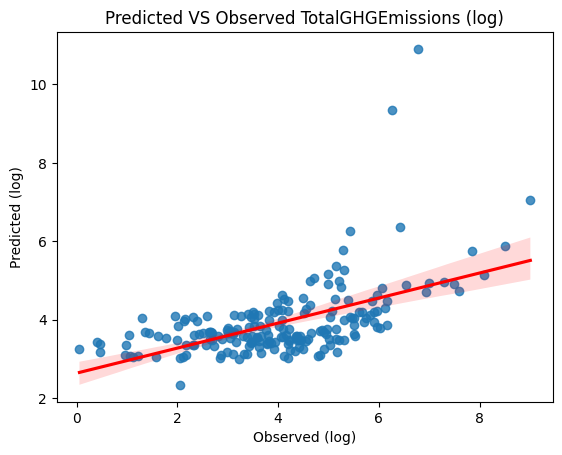

In [62]:
sns.regplot(x=Y_GHG_test, y=Y_GHG_pred_lr[:,0], line_kws={"color":"r"})
plt.title("Predicted VS Observed TotalGHGEmissions (log)")
plt.xlabel("Observed (log)")
plt.ylabel("Predicted (log)")
plt.show()

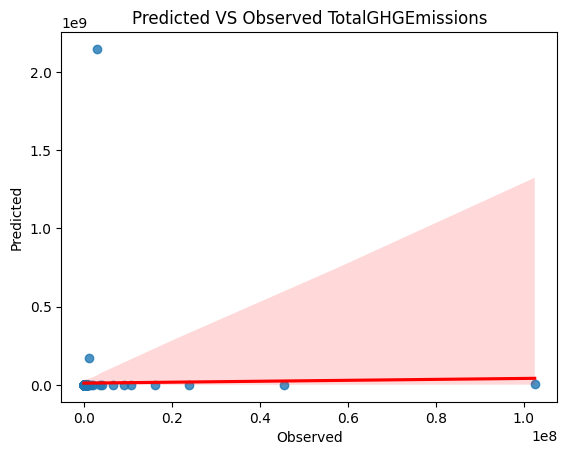

In [63]:
sns.regplot(x=np.exp(ss.inverse_transform(Y_GHG_test)), y=np.exp(ss.inverse_transform(Y_GHG_pred_lr)), line_kws={"color":"r"})
plt.title("Predicted VS Observed TotalGHGEmissions")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

### Ridge Regression

In [64]:
mse_ridge_train = metrics.mean_squared_error(Y_GHG_train,Y_GHG_train_ridge)
r2_ridge_train = metrics.r2_score(Y_GHG_train,Y_GHG_train_ridge)
mae_ridge_train = metrics.mean_absolute_error(Y_GHG_train,Y_GHG_train_ridge)
print("RMSE_train=", mse_ridge_train**(1/2), "R2_train=", r2_ridge_train, "MAE_train=", mae_ridge_train)

RMSE_train= 1.2060265002431576 R2_train= 0.3369592407138191 MAE_train= 0.9570481344033355


In [65]:
mse_ridge = metrics.mean_squared_error(Y_GHG_test,Y_GHG_pred_ridge)
r2_ridge = metrics.r2_score(Y_GHG_test,Y_GHG_pred_ridge)
mae_ridge = metrics.mean_absolute_error(Y_GHG_test,Y_GHG_pred_ridge)
print("RMSE=", mse_ridge**(1/2), "R2=", r2_ridge, "MAE=", mae_ridge)

RMSE= 1.3434955523897587 R2= 0.29601676368868635 MAE= 1.0734585901371865


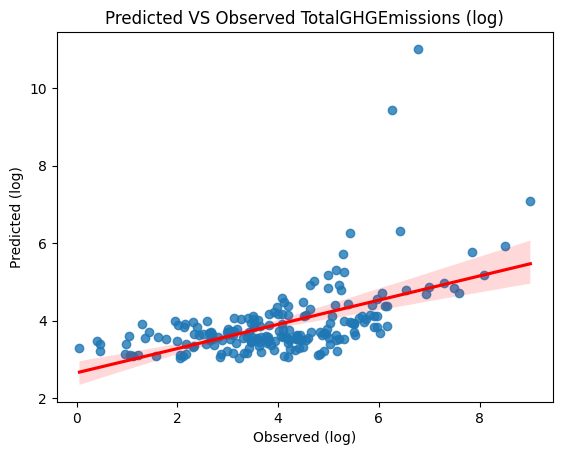

In [66]:
sns.regplot(x=Y_GHG_test, y=Y_GHG_pred_ridge[:,0], line_kws={"color":"r"})
plt.title("Predicted VS Observed TotalGHGEmissions (log)")
plt.xlabel("Observed (log)")
plt.ylabel("Predicted (log)")
plt.show()

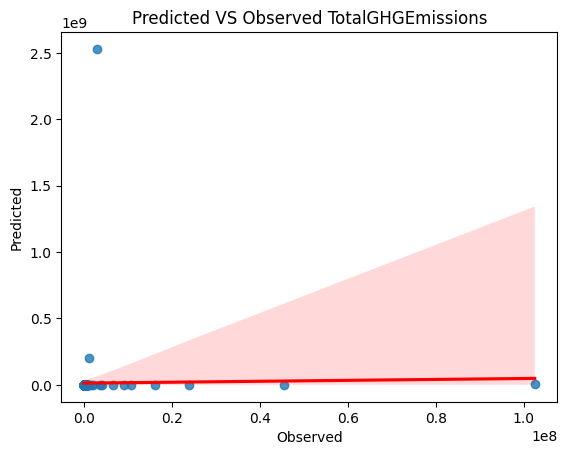

In [67]:
sns.regplot(x=np.exp(ss.inverse_transform(Y_GHG_test)), y=np.exp(ss.inverse_transform(Y_GHG_pred_ridge)), line_kws={"color":"r"})
plt.title("Predicted VS Observed TotalGHGEmissions")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

# **5. Feature Engineering**

In [68]:
df_final

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
OSEBuildingID,,,,,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,7.226362e+06,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,1.0,11,103566,88502,83880.0,8.387933e+06,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,1.0,41,956110,759392,756493.0,7.258702e+07,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,90,1.0,10,61320,61320,61320.0,6.794584e+06,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,36,1.0,18,175580,113580,123445.0,1.417261e+07,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50069,87,1.0,2,24990,24990,24990.0,4.420650e+06,134.80,15.301797,4.903792,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50081,1,1.0,3,45000,45000,45728.0,1.325973e+06,9.24,14.097657,2.223542,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
50210,64,1.0,1,13661,13661,13661.0,5.026677e+05,3.50,13.127685,1.252763,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [69]:
index_final=list(df_final.index)

In [70]:
df_nr=pd.read_csv('/content/drive/MyDrive/P4/df_nr.csv',sep=",")
df_nr.set_index(["OSEBuildingID"], inplace=True)
df_nr

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83,89
2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86,20
3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19,47
5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67,90
8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70,26
50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01,12
50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreatio

In [71]:
df_fe = df_nr.loc[index_final]
df_fe

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83,89
2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86,20
3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19,47
5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67,90
8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50069,2016,NonResidential,Small- and Mid-Sized Office,Airport - Main Terminal,7277 Perimeter Rd.,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,Office,Office,24990.0,NaN,NaN,NaN,NaN,NaN,9.0,176.899994,189.300003,367.000000,378.700012,4.420650e+06,4.731814e+06,0.00,6.351199e+05,2.167029e+06,22536.210940,2.253621e+06,False,NaN,Compliant,NaN,134.80,5.39,87
50081,2016,NonResidential,K-12 School,Hamlin Robinson School,1701 20th Ave South,Seattle,WA,98144.0,7548300840,3,GREATER DUWAMISH,47.58831,-122.30650,2015,1.0,3,45000,0,45000,"K-12 School, Parking",K-12 School,45728.0,Parking,0.0,NaN,NaN,NaN,77.0,29.000000,30.600000,91.099998,96.000000,1.325973e+06,1.397742e+06,0.00,3.886204e+05,1.325973e+06,0.000000,0.000000e+00,False,NaN,Compliant,NaN,9.24,0.21,1
50210,2016,Nonresidential COS,Office,Central West HQ / Brown Bear,1403 w howe,Seattle,WA,NaN,2425039137,7,MAGNOLIA / QUEEN ANNE,47.63572,-122.37525,1952,1.0,1,13661,0,13661,Office,Office,13661.0,NaN,NaN,NaN,NaN,NaN,75.0

In [72]:
df_fe['GFA1st_%']=(df_fe['LargestPropertyUseTypeGFA']/df_fe['PropertyGFATotal']*100).round()
df_fe['GFA2nd_%']=(df_fe['SecondLargestPropertyUseTypeGFA']/df_fe['PropertyGFATotal']*100).round()
df_fe['GFA3rd_%']=(df_fe['ThirdLargestPropertyUseTypeGFA']/df_fe['PropertyGFATotal']*100).round()

In [73]:
df_fe['Steam_%']=(df_fe['SteamUse(kBtu)']/df_fe['SiteEnergyUse(kBtu)']*100).round()
df_fe['Electricity_%']=(df_fe['Electricity(kBtu)']/df_fe['SiteEnergyUse(kBtu)']*100).round()
df_fe['Gas_%']=(df_fe['NaturalGas(kBtu)']/df_fe['SiteEnergyUse(kBtu)']*100).round()

In [74]:
df_fe=df_fe[['GFA1st_%','GFA2nd_%','GFA3rd_%','Steam_%','Electricity_%','Gas_%']]
df_fe.head(5)

,GFA1st_%,GFA2nd_%,GFA3rd_%,Steam_%,Electricity_%,Gas_%
OSEBuildingID,,,,,,
1,100.0,NaN,NaN,28.0,55.0,18.0
2,81.0,15.0,4.0,0.0,39.0,61.0
3,79.0,NaN,NaN,30.0,68.0,2.0
5,100.0,NaN,NaN,33.0,41.0,27.0
8,70.0,39.0,0.0,0.0,38.0,62.0


In [75]:
df_final=df_final.join(df_fe)
df_final.head(5)

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH,GFA1st_%,GFA2nd_%,GFA3rd_%,Steam_%,Electricity_%,Gas_%
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,7226362.5,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,100.0,NaN,NaN,28.0,55.0,18.0
2,20,1.0,11,103566,88502,83880.0,8387933.0,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,81.0,15.0,4.0,0.0,39.0,61.0
3,47,1.0,41,956110,759392,756493.0,72587024.0,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,79.0,NaN,NaN,30.0,68.0,2.0
5,90,1.0,10,61320,61320,61320.0,6794584.0,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,100.0,NaN,NaN,33.0,41.0,27.0
8,36,1.0,18,175580,113580,123445.0,14172606.0,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,70.0,39.0,0.0,0.0,38.0,62.0


In [76]:
df_final.columns

Index(['BuildingAge', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log', 'PPT_1', 'PPT_2',
       'PPT_3', 'PPT_4', 'PPT_5', 'PPT_6', 'CENTRAL', 'NORTH', 'SOUTH',
       'GFA1st_%', 'GFA2nd_%', 'GFA3rd_%', 'Steam_%', 'Electricity_%',
       'Gas_%'],
      dtype='object')

In [77]:
order_fe=['BuildingAge', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'GFA1st_%', 'GFA2nd_%', 'GFA3rd_%',
       'Steam_%', 'Electricity_%', 'Gas_%',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log', 
       'PPT_1', 'PPT_2', 'PPT_3', 'PPT_4', 'PPT_5', 'PPT_6', 'CENTRAL', 'NORTH', 'SOUTH']
df_final= df_final[order_fe]
df_final.head(5)

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,GFA1st_%,GFA2nd_%,GFA3rd_%,Steam_%,Electricity_%,Gas_%,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,100.0,NaN,NaN,28.0,55.0,18.0,7226362.5,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,1.0,11,103566,88502,83880.0,81.0,15.0,4.0,0.0,39.0,61.0,8387933.0,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,1.0,41,956110,759392,756493.0,79.0,NaN,NaN,30.0,68.0,2.0,72587024.0,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,90,1.0,10,61320,61320,61320.0,100.0,NaN,NaN,33.0,41.0,27.0,6794584.0,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,36,1.0,18,175580,113580,123445.0,70.0,39.0,0.0,0.0,38.0,62.0,14172606.0,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## GFA %

Considering only the surface area of the different property use types as a percentage of the total area

In [78]:
df_GFA=df_final.dropna(axis=0, how='any')
df_GFA

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,GFA1st_%,GFA2nd_%,GFA3rd_%,Steam_%,Electricity_%,Gas_%,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,
2,20,1.0,11,103566,88502,83880.0,81.0,15.0,4.0,0.0,39.0,61.0,8387933.0,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,36,1.0,18,175580,113580,123445.0,70.0,39.0,0.0,0.0,38.0,62.0,14172606.0,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
57,43,1.0,5,168115,168115,103362.0,61.0,39.0,0.0,0.0,100.0,0.0,9536161.0,66.48,16.070602,4.196901,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62,86,1.0,20,98634,88591,83591.0,85.0,10.0,5.0,0.0,89.0,11.0,4841347.5,59.19,15.392704,4.080753,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
63,34,1.0,34,994212,847518,994212.0,100.0,12.0,0.0,14.0,57.0,29.0,80469216.0,2451.58,18.203385,7.804488,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49737,98,1.0,3,43832,43832,24588.0,56.0,40.0,4.0,0.0,35.0,65.0,3886545.0,144.41,15.173031,4.972656,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
49776,28,1.0,13,354086,204760,193393.0,55.0,42.0,11.0,0.0,91.0,9.0,13458948.0,147.84,16.415155,4.996131,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49802,3,1.0,4,62381,39433,60245.0,97.0,42.0,0.0,0.0,100.0,0.0,3497215.5,24.38,15.067478,3.193763,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
X_GFA = df_GFA[['GFA1st_%','GFA2nd_%','GFA3rd_%']]
Y_GHG_GFA = df_GFA[target1]

In [80]:
X_train_gfa, X_test_gfa, Y_GHG_train_gfa, Y_GHG_test_gfa = train_test_split(X_GFA, Y_GHG_GFA, test_size = 0.2, random_state=42)
print(f'X_train_gda is in shape of {X_train_gfa.shape}')
print(f'X_test_gfa is in shape of {X_test_gfa.shape}')

X_train_gda is in shape of (124, 3)
X_test_gfa is in shape of (32, 3)


In [81]:
X_train_ss_gfa = ss.fit_transform(X_train_gfa)
X_test_ss_gfa = ss.fit_transform(X_test_gfa)

Y_GHG_train_ss_gfa = ss.fit_transform(np.array(Y_GHG_train_gfa).reshape(-1, 1))
Y_GHG_test_ss_gfa = ss.fit_transform(np.array(Y_GHG_test_gfa).reshape(-1, 1))

In [82]:
lr_gridsearch.fit(X_train_gfa,Y_GHG_train_gfa)
print(lr_gridsearch.best_params_)
print(lr_gridsearch.best_estimator_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'fit_intercept': True}
LinearRegression()


In [83]:
Y_GHG_pred_lr_gfa = lr_gridsearch.predict(X_test_gfa)

In [84]:
mse_gfa = metrics.mean_squared_error(Y_GHG_test_gfa,Y_GHG_pred_lr_gfa)
r2_gfa = metrics.r2_score(Y_GHG_test_gfa,Y_GHG_pred_lr_gfa)
mae_gfa = metrics.mean_absolute_error(Y_GHG_test_gfa,Y_GHG_pred_lr_gfa)
print("RMSE=", mse_gfa**(1/2), "R2=", r2_gfa, "MAE=", mae_gfa)

RMSE= 1.2673271521490306 R2= 0.16333820324713444 MAE= 1.0884612172844867


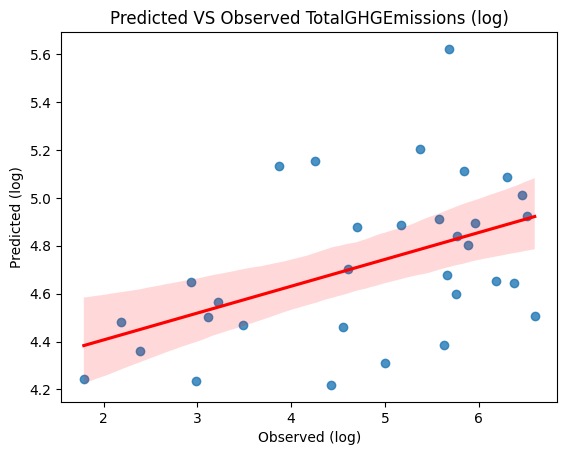

In [85]:
sns.regplot(x=Y_GHG_test_gfa, y=Y_GHG_pred_lr_gfa[:,0], line_kws={"color":"r"})
plt.title("Predicted VS Observed TotalGHGEmissions (log)")
plt.xlabel("Observed (log)")
plt.ylabel("Predicted (log)")
plt.show()

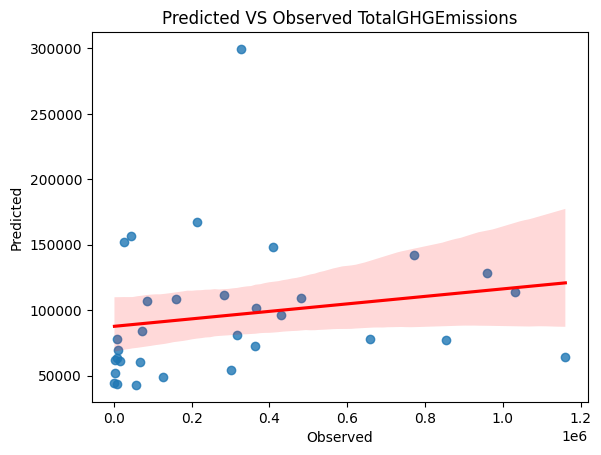

In [86]:
sns.regplot(x=np.exp(ss.inverse_transform(Y_GHG_test_gfa)), y=np.exp(ss.inverse_transform(Y_GHG_pred_lr_gfa)), line_kws={"color":"r"})
plt.title("Predicted VS Observed TotalGHGEmissions")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

## Electricity/Steam/Gas %

Considering only electricity/stream/gas as a percentage of total energy use

In [87]:
df_ESG=df_final[['Steam_%','Electricity_%','Gas_%']]
df_ESG.dropna(axis=0, how='any', inplace=True)
df_ESG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 1 to 50222
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Steam_%        982 non-null    float64
 1   Electricity_%  982 non-null    float64
 2   Gas_%          982 non-null    float64
dtypes: float64(3)
memory usage: 63.0 KB


<ipython-input-87-62d6bf3e2d5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ESG.dropna(axis=0, how='any', inplace=True)


In [88]:
X_ESG = df_ESG
Y_GHG_ESG = df_final[target1]

In [89]:
X_train_esg, X_test_esg, Y_GHG_train_esg, Y_GHG_test_esg = train_test_split(X_ESG, Y_GHG_ESG, test_size = 0.2, random_state=42)
print(f'X_train_esg is in shape of {X_train_esg.shape}')
print(f'X_test_esg is in shape of {X_test_esg.shape}')

X_train_esg is in shape of (785, 3)
X_test_esg is in shape of (197, 3)


In [90]:
X_train_ss_esg = ss.fit_transform(X_train_esg)
X_test_ss_esg = ss.fit_transform(X_test_esg)

Y_GHG_train_ss_esg = ss.fit_transform(np.array(Y_GHG_train_esg).reshape(-1, 1))
Y_GHG_test_ss_esg = ss.fit_transform(np.array(Y_GHG_test_esg).reshape(-1, 1))

In [91]:
lr_gridsearch.fit(X_train_esg,Y_GHG_train_esg)
Y_GHG_pred_lr_esg = lr_gridsearch.predict(X_test_esg)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [92]:
mse_esg = metrics.mean_squared_error(Y_GHG_test_esg,Y_GHG_pred_lr_esg)
r2_esg = metrics.r2_score(Y_GHG_test_esg,Y_GHG_pred_lr_esg)
mae_esg = metrics.mean_absolute_error(Y_GHG_test_esg,Y_GHG_pred_lr_esg)
print("RMSE=", mse_esg**(1/2), "R2=", r2_esg, "MAE=", mae_esg)

RMSE= 1.3958666933690727 R2= 0.24006273603338713 MAE= 1.1080655941793187


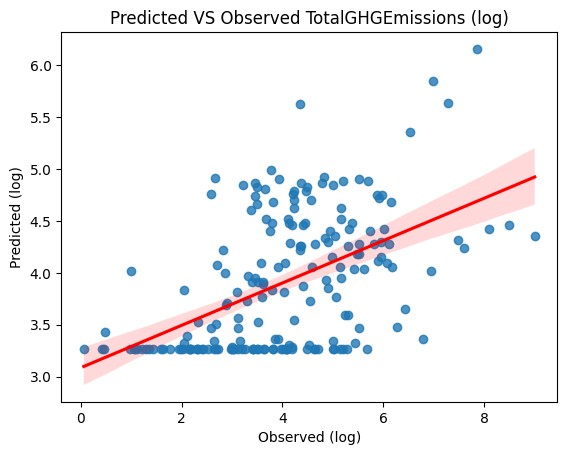

In [93]:
sns.regplot(x=Y_GHG_test_esg, y=Y_GHG_pred_lr_esg[:,0], line_kws={"color":"r"})
plt.title("Predicted VS Observed TotalGHGEmissions (log)")
plt.xlabel("Observed (log)")
plt.ylabel("Predicted (log)")
plt.show()

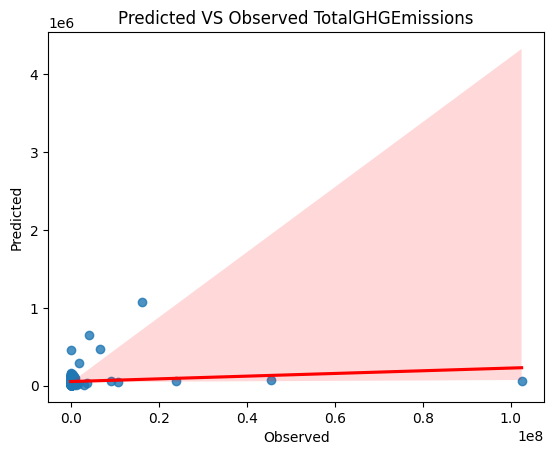

In [94]:
sns.regplot(x=np.exp(ss.inverse_transform(Y_GHG_test_esg)), y=np.exp(ss.inverse_transform(Y_GHG_pred_lr_esg)), line_kws={"color":"r"})
plt.title("Predicted VS Observed TotalGHGEmissions")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

## Building info: BuildingAge, NumberofBuildings,	NumberofFloors,	PropertyGFATotal

Considering only these 4 variables

In [95]:
df_4f=df_final[['BuildingAge','NumberofBuildings','NumberofFloors','PropertyGFATotal']]

In [96]:
X_4f = df_4f
Y_GHG_4f = df_final[target1]

X_train_4f, X_test_4f, Y_GHG_train_4f, Y_GHG_test_4f = train_test_split(X_4f, Y_GHG_4f, test_size = 0.2, random_state=42)
print(f'X_train_4f is in shape of {X_train_4f.shape}')
print(f'X_test_4f is in shape of {X_test_4f.shape}')

X_train_ss_4f = ss.fit_transform(X_train_4f)
X_test_ss_4f = ss.fit_transform(X_test_4f)

Y_GHG_train_ss_4f = ss.fit_transform(np.array(Y_GHG_train_4f).reshape(-1, 1))
Y_GHG_test_ss_4f = ss.fit_transform(np.array(Y_GHG_test_4f).reshape(-1, 1))

lr_gridsearch.fit(X_train_4f,Y_GHG_train_4f)
Y_GHG_pred_lr_4f = lr_gridsearch.predict(X_test_4f)

mse_4f = metrics.mean_squared_error(Y_GHG_test_4f,Y_GHG_pred_lr_4f)
r2_4f = metrics.r2_score(Y_GHG_test_4f,Y_GHG_pred_lr_4f)
mae_4f = metrics.mean_absolute_error(Y_GHG_test_4f,Y_GHG_pred_lr_4f)
print("RMSE=", mse_4f**(1/2), "R2=", r2_4f, "MAE=", mae_4f)

X_train_4f is in shape of (785, 4)
X_test_4f is in shape of (197, 4)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
RMSE= 1.384406688896036 R2= 0.2524896170606097 MAE= 1.0947909687648152


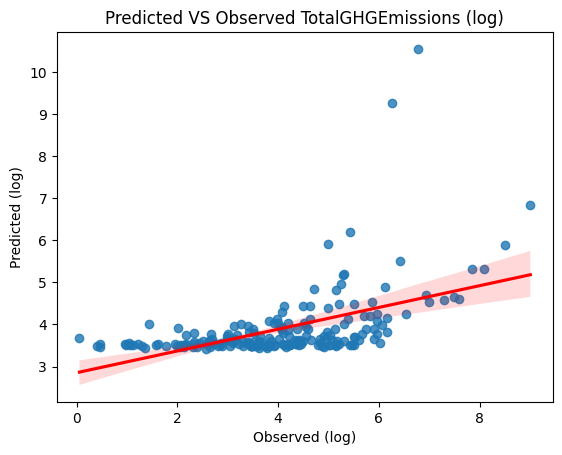

In [97]:
sns.regplot(x=Y_GHG_test_4f, y=Y_GHG_pred_lr_4f[:,0], line_kws={"color":"r"})
plt.title("Predicted VS Observed TotalGHGEmissions (log)")
plt.xlabel("Observed (log)")
plt.ylabel("Predicted (log)")
plt.show()

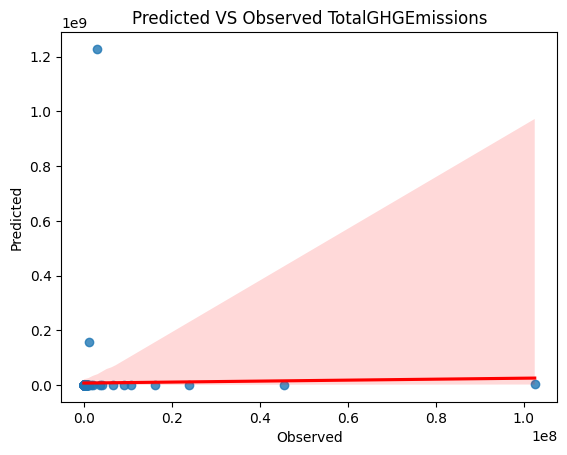

In [98]:
sns.regplot(x=np.exp(ss.inverse_transform(Y_GHG_test_4f)), y=np.exp(ss.inverse_transform(Y_GHG_pred_lr_4f)), line_kws={"color":"r"})
plt.title("Predicted VS Observed TotalGHGEmissions")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

## Building single info: one of these 4 variables: BuildingAge, NumberofBuildings, NumberofFloors, PropertyGFATotal

In [99]:
#df_1f=df_final[['BuildingAge']]
#df_1f=df_final[['NumberofBuildings']]
#df_1f=df_final[['NumberofFloors']]
df_1f=df_final[['PropertyGFATotal']]

In [100]:
X_1f = df_1f
Y_GHG_1f = df_final[target1]

X_train_1f, X_test_1f, Y_GHG_train_1f, Y_GHG_test_1f = train_test_split(X_1f, Y_GHG_1f, test_size = 0.2, random_state=42)
print(f'X_train_1f is in shape of {X_train_1f.shape}')
print(f'X_test_1f is in shape of {X_test_1f.shape}')

X_train_ss_1f = ss.fit_transform(X_train_1f)
X_test_ss_1f = ss.fit_transform(X_test_1f)
Y_GHG_train_ss_1f = ss.fit_transform(np.array(Y_GHG_train_1f).reshape(-1, 1))
Y_GHG_test_ss_1f = ss.fit_transform(np.array(Y_GHG_test_1f).reshape(-1, 1))

lr_gridsearch.fit(X_train_1f,Y_GHG_train_1f)
Y_GHG_pred_lr_1f = lr_gridsearch.predict(X_test_1f)

mse_1f = metrics.mean_squared_error(Y_GHG_test_1f,Y_GHG_pred_lr_1f)
r2_1f = metrics.r2_score(Y_GHG_test_1f,Y_GHG_pred_lr_1f)
mae_1f = metrics.mean_absolute_error(Y_GHG_test_1f,Y_GHG_pred_lr_1f)
print("RMSE=", mse_1f**(1/2), "R2=", r2_1f, "MAE=", mae_1f)

X_train_1f is in shape of (785, 1)
X_test_1f is in shape of (197, 1)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
RMSE= 1.3950104280924387 R2= 0.2409947853659783 MAE= 1.0980257842941996


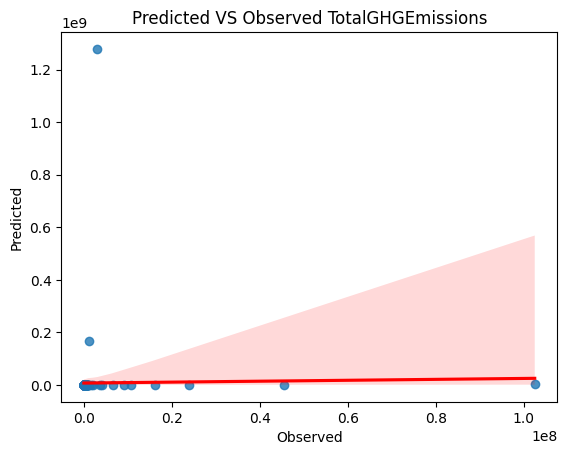

In [101]:
sns.regplot(x=np.exp(ss.inverse_transform(Y_GHG_test_1f)), y=np.exp(ss.inverse_transform(Y_GHG_pred_lr_1f)), line_kws={"color":"r"})
plt.title("Predicted VS Observed TotalGHGEmissions")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

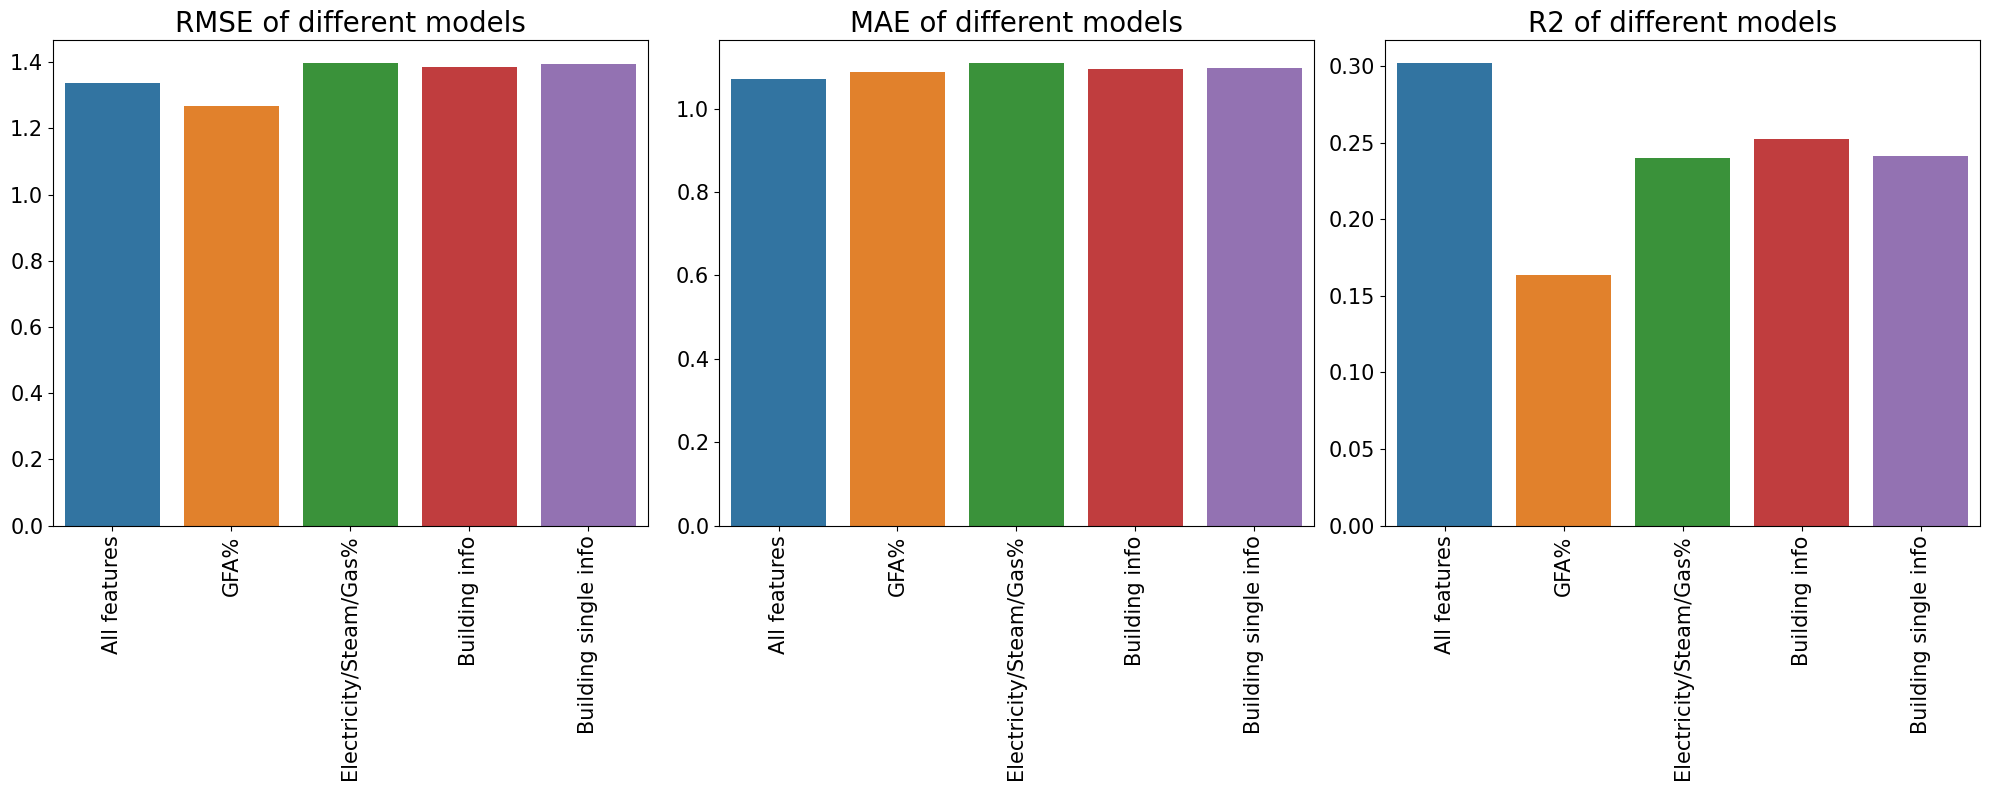

In [102]:
fig = plt.figure(figsize = (20, 8))
listeModeles = ['All features', 'GFA%', 'Electricity/Steam/Gas%', 'Building info', 'Building single info']

listeMSE = [mse_lr, mse_gfa, mse_esg, mse_4f, mse_1f]
listeRMSE = [i**(1/2) for i in listeMSE]

listeMAE = [mae_lr, mae_gfa, mae_esg, mae_4f, mae_1f]

listeR2 = [r2_lr, r2_gfa, r2_esg, r2_4f, r2_1f]

plt.subplot(1,3,1)
sns.barplot(x = listeModeles, y = listeRMSE)
plt.title('RMSE of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,3,2)
sns.barplot(x = listeModeles, y = listeMAE)
plt.title('MAE of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,3,3)
sns.barplot(x = listeModeles, y = listeR2)
plt.title('R2 of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

fig.tight_layout()
plt.show()

Clearly, the linear model with all the features produces the best result.

# **6. Nonlinear Modelling: Random Forest**

In [103]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor 

In [104]:
np.random.seed(5)
cv_train = KFold(n_splits = 5, shuffle = True, random_state = 45)

In [105]:
#param_rf = { 
#    'n_estimators': [100, 200, 300, 500, 800, 1000, 1200],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : [5, 10, 15, 20, 25, 30, 35, None],
#    'bootstrap' : [True, False]}

In [106]:
#rf = GridSearchCV(RandomForestRegressor(),
#                   param_grid = param_rf,
#                   verbose = 2,
#                   cv = cv_train,
#                   scoring = score,
#                   refit = 'neg_mean_absolute_error',
#                   return_train_score = True,
#                   n_jobs = -1)

In [107]:
#rf.fit(X_train,Y_GHG_train)

In [108]:
#rf.best_params_

In [109]:
param_rf = {'bootstrap': [True],
 'max_depth': [10],
 'max_features': ['log2'],
 'n_estimators': [1000]}

In [110]:
#rf = GridSearchCV(RandomForestRegressor(),
#                   param_grid = param_rf,
#                   verbose = 2,
#                   cv = cv_train,
#                   scoring = score,
#                   refit = 'neg_mean_absolute_error',
#                   return_train_score = True,
#                   n_jobs = -1)

In [111]:
rf = RandomForestRegressor(n_estimators=1000,
               criterion = 'absolute_error',
               max_depth=10,
               max_features='log2',
               bootstrap=True,
               n_jobs = -1,
               verbose = 2)

In [112]:
rf.fit(X_train,Y_GHG_train)

<ipython-input-112-2f784e75d756>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_GHG_train)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000
building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000building tree 9 of 1000

building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000building tree 14 of 1000

building tree 15 of 1000building tree 16 of 1000

building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.6s


building tree 46 of 1000
building tree 47 of 1000
building tree 48 of 1000
building tree 49 of 1000building tree 50 of 1000

building tree 51 of 1000building tree 52 of 1000

building tree 53 of 1000building tree 54 of 1000

building tree 55 of 1000building tree 56 of 1000

building tree 57 of 1000
building tree 58 of 1000
building tree 59 of 1000
building tree 60 of 1000
building tree 61 of 1000
building tree 62 of 1000
building tree 63 of 1000building tree 64 of 1000

building tree 65 of 1000building tree 66 of 1000

building tree 67 of 1000
building tree 68 of 1000
building tree 69 of 1000
building tree 70 of 1000
building tree 71 of 1000building tree 72 of 1000

building tree 73 of 1000
building tree 74 of 1000
building tree 75 of 1000
building tree 76 of 1000
building tree 77 of 1000building tree 78 of 1000

building tree 79 of 1000
building tree 80 of 1000
building tree 81 of 1000
building tree 82 of 1000
building tree 83 of 1000
building tree 84 of 1000
building tree 85 of 1000


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    2.7s


building tree 165 of 1000
building tree 166 of 1000
building tree 167 of 1000
building tree 168 of 1000
building tree 169 of 1000
building tree 170 of 1000
building tree 171 of 1000
building tree 172 of 1000
building tree 173 of 1000
building tree 174 of 1000
building tree 175 of 1000
building tree 176 of 1000
building tree 177 of 1000
building tree 178 of 1000
building tree 179 of 1000
building tree 180 of 1000
building tree 181 of 1000building tree 182 of 1000

building tree 183 of 1000
building tree 184 of 1000
building tree 185 of 1000building tree 186 of 1000

building tree 187 of 1000building tree 188 of 1000

building tree 189 of 1000
building tree 190 of 1000
building tree 191 of 1000
building tree 192 of 1000
building tree 193 of 1000
building tree 194 of 1000
building tree 195 of 1000
building tree 196 of 1000
building tree 197 of 1000
building tree 198 of 1000
building tree 199 of 1000building tree 200 of 1000

building tree 201 of 1000
building tree 202 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:    6.4s


building tree 370 of 1000building tree 371 of 1000

building tree 372 of 1000building tree 373 of 1000

building tree 374 of 1000building tree 375 of 1000

building tree 376 of 1000building tree 377 of 1000

building tree 378 of 1000building tree 379 of 1000

building tree 380 of 1000
building tree 381 of 1000
building tree 382 of 1000
building tree 383 of 1000
building tree 384 of 1000building tree 385 of 1000

building tree 386 of 1000
building tree 387 of 1000
building tree 388 of 1000
building tree 389 of 1000
building tree 390 of 1000
building tree 391 of 1000
building tree 392 of 1000
building tree 393 of 1000
building tree 394 of 1000
building tree 395 of 1000building tree 396 of 1000

building tree 397 of 1000
building tree 398 of 1000
building tree 399 of 1000
building tree 400 of 1000
building tree 401 of 1000building tree 402 of 1000

building tree 403 of 1000
building tree 404 of 1000
building tree 405 of 1000
building tree 406 of 1000
building tree 407 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:    9.1s


building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tree 681 of 1000
building tree 682 of 1000
building tree 683 of 1000
building tree 684 of 1000
building tree 685 of 1000
building tree 686 of 1000
building tree 687 of 1000
building tree 688 of 1000
building tree 689 of 1000
building tree 690 of 1000
building tree 691 of 1000
building tree 692 of 1000
building tree 693 of 1000
building tree 694 of 1000
building tree 695 of 1000
building tree 696 of 1000
building tree 697 of 1000
building tree 698 of 1000
building tree 699 of 1000
building tree 700 of 1000
building tree 701 of 1000
building tre

[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   11.4s finished


RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='log2', n_estimators=1000, n_jobs=-1,
                      verbose=2)

In [113]:
Y_GHG_train_rf = rf.predict(X_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.3s finished


In [114]:
Y_GHG_pred_rf = rf.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [115]:
mse_rf_train = metrics.mean_squared_error(Y_GHG_train,Y_GHG_train_rf)
r2_rf_train = metrics.r2_score(Y_GHG_train,Y_GHG_train_rf)
mae_rf_train = metrics.mean_absolute_error(Y_GHG_train,Y_GHG_train_rf)
print("RMSE_train=", mse_rf_train**(1/2), "R2_train=", r2_rf_train, "MAE_train=", mae_rf_train)

RMSE_train= 0.6977542788986261 R2_train= 0.7780620643669031 MAE_train= 0.5320867849039503


In [116]:
mse_rf = metrics.mean_squared_error(Y_GHG_test,Y_GHG_pred_rf)
r2_rf = metrics.r2_score(Y_GHG_test,Y_GHG_pred_rf)
mae_rf = metrics.mean_absolute_error(Y_GHG_test,Y_GHG_pred_rf)
print("RMSE=", mse_rf**(1/2), "R2=", r2_rf, "MAE=", mae_rf)

RMSE= 1.1949445641888874 R2= 0.4430895496563527 MAE= 0.9524576976925198


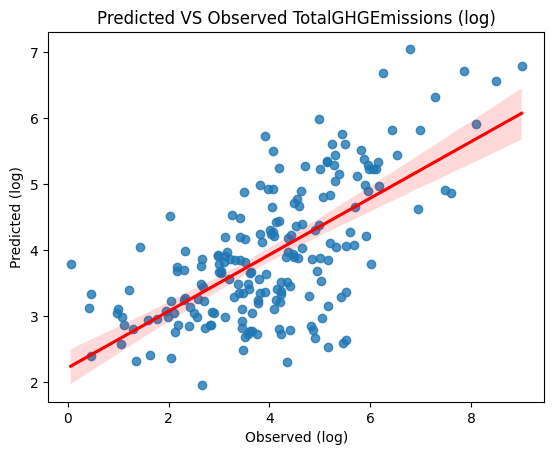

In [117]:
sns.regplot(x=Y_GHG_test, y=Y_GHG_pred_rf, line_kws={"color":"r"})
plt.title("Predicted VS Observed TotalGHGEmissions (log)")
plt.xlabel("Observed (log)")
plt.ylabel("Predicted (log)")
plt.show()

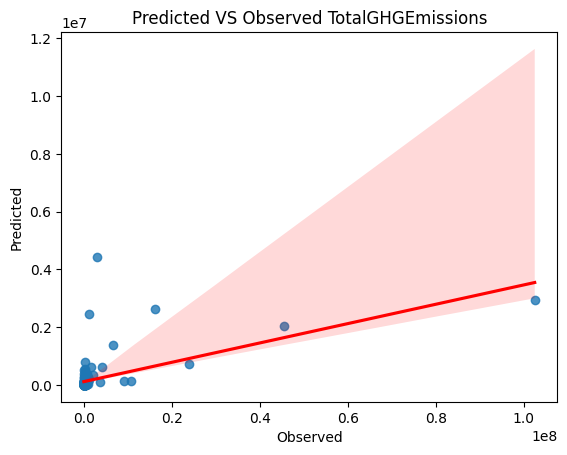

In [118]:
sns.regplot(x=np.exp(ss.inverse_transform(Y_GHG_test)), y=np.exp(ss.inverse_transform(Y_GHG_pred_rf.reshape(-1, 1))), line_kws={"color":"r"})
plt.title("Predicted VS Observed TotalGHGEmissions")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

# **7. Models Comparison**

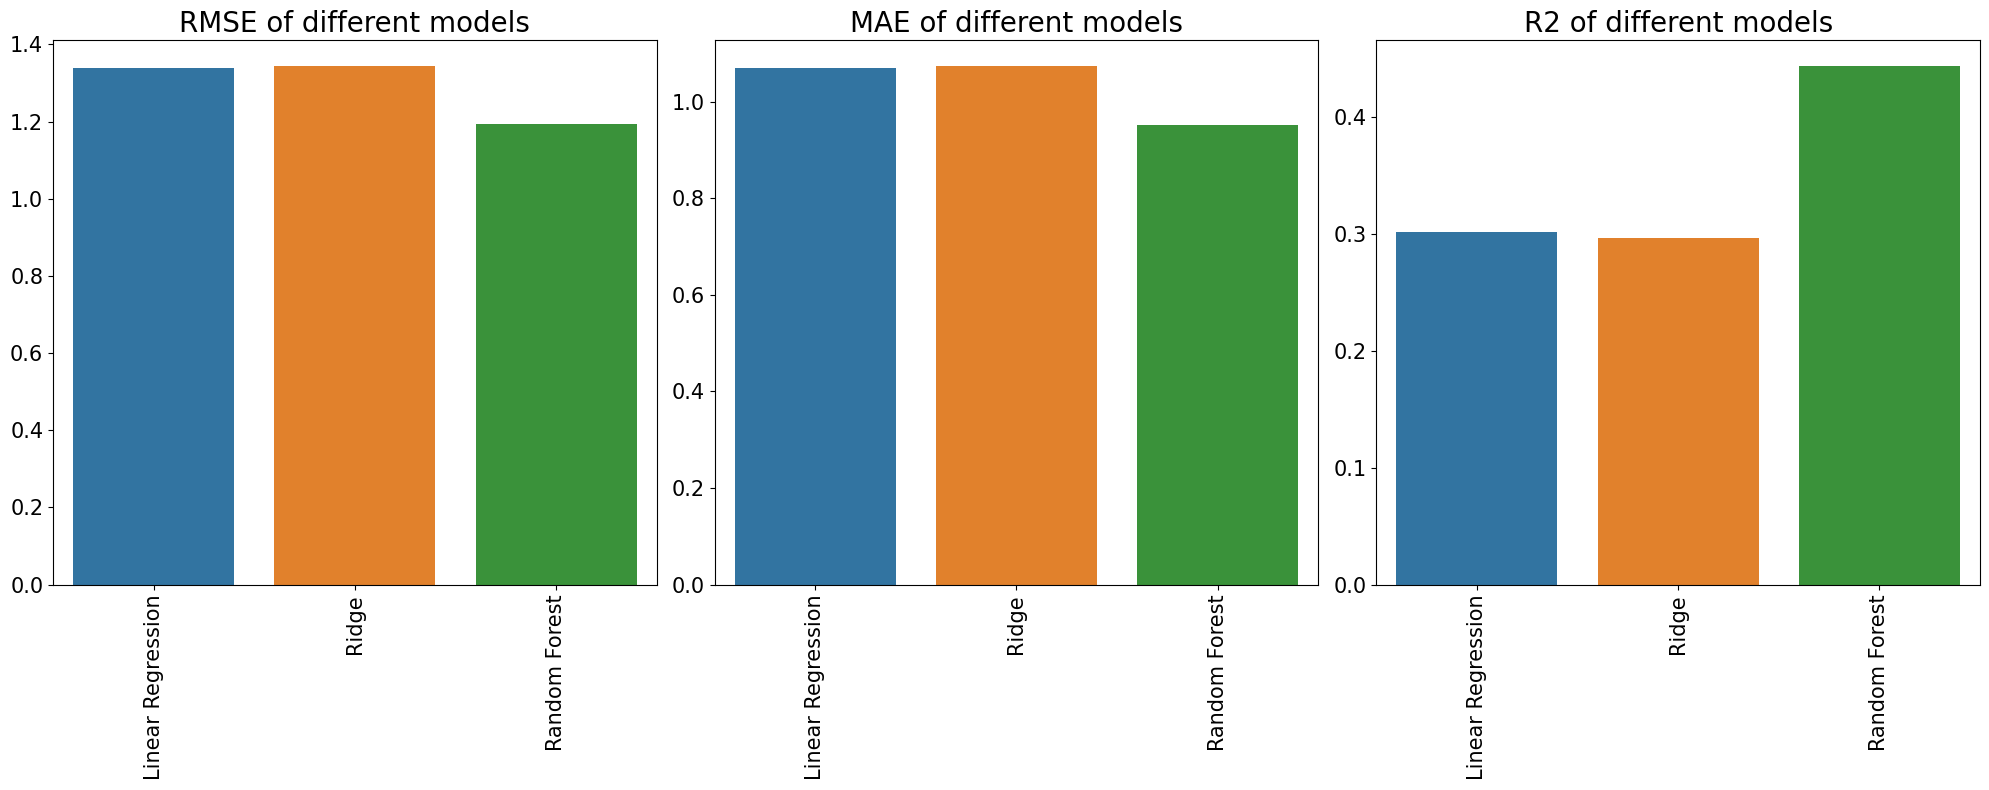

In [119]:
fig = plt.figure(figsize = (20, 8))
listeModeles = ['Linear Regression', 'Ridge', 'Random Forest']

listeMSE = [mse_lr, mse_ridge, mse_rf]
listeRMSE = [I**(1/2) for I in listeMSE]

listeMAE = [mae_lr, mae_ridge, mae_rf]

listeR2 = [r2_lr, r2_ridge, r2_rf]

plt.subplot(1,3,1)
sns.barplot(x = listeModeles, y = listeRMSE)
plt.title('RMSE of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,3,2)
sns.barplot(x = listeModeles, y = listeMAE)
plt.title('MAE of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,3,3)
sns.barplot(x = listeModeles, y = listeR2)
plt.title('R2 of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

fig.tight_layout()
plt.show()

Random Forest produces better results.

# **8. Feature Importance**

In [120]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 33.4 MB/s eta 0:00:00


In [121]:
import shap
from shap import TreeExplainer, Explanation
from shap.plots import waterfall

In [122]:
shap.initjs()

In [123]:
explainer = shap.TreeExplainer(rf,feature_perturbation="correlation_dependent")

In [124]:
shap_values = explainer.shap_values(X_test)
shap_values

array([[-0.01129451, -0.00300912, -0.05690774, ..., -0.00537393,
        -0.0143406 , -0.04879723],
       [ 0.03678459, -0.00327054, -0.03482576, ...,  0.00557882,
        -0.02297366, -0.05846446],
       [ 0.02222144, -0.00444333, -0.0457852 , ...,  0.02416112,
         0.09822606,  0.03189094],
       ...,
       [ 0.06016162, -0.00139852, -0.06697752, ...,  0.00464845,
        -0.01079871,  0.0194369 ],
       [ 0.01014847, -0.00327187, -0.0552232 , ..., -0.00335359,
        -0.02116859, -0.06379452],
       [-0.0456236 , -0.00332301, -0.05531904, ...,  0.01627055,
        -0.00623182,  0.03624465]])

In [125]:
rf.feature_importances_

array([0.10700843, 0.01279247, 0.11721213, 0.20236965, 0.21806392,
       0.20232464, 0.02872967, 0.01904931, 0.01672206, 0.0194874 ,
       0.01129325, 0.00470367, 0.01375565, 0.01183407, 0.01465369])

## Global Variable

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


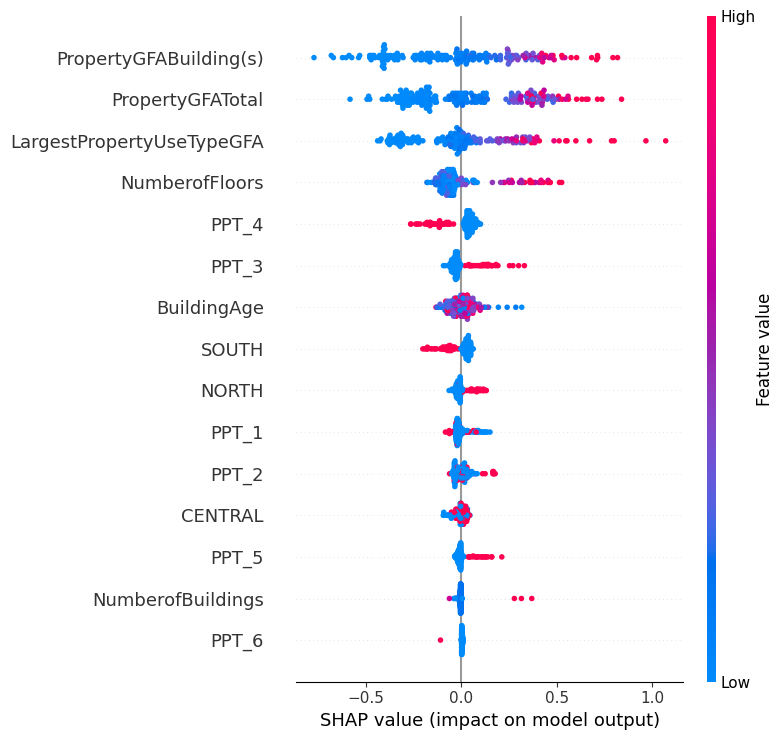

In [126]:
shap.summary_plot(shap_values, X_test)

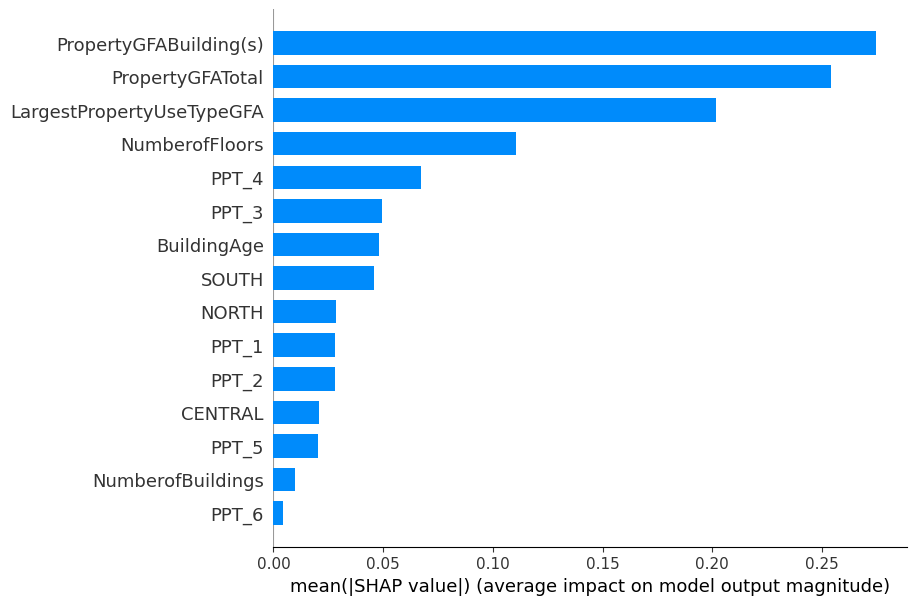

In [127]:
fig = plt.figure()
shap.summary_plot(shap_values,
                  feature_names=X_test.columns,
                  plot_type="bar",
                  show=False
                  )
plt.gcf().set_size_inches(10,6)
plt.show()

## Local Variable

###Bar Plot

In [128]:
Y_GHG_test.describe()

,TotalGHGEmissions_log
count,197.000000
mean,4.025504
std,1.605315
min,0.058269
25%,3.004692
50%,4.055777
75%,5.068401
max,9.005223


In [129]:
Y_GHG_test[Y_GHG_test['TotalGHGEmissions_log']>9]

,TotalGHGEmissions_log
OSEBuildingID,
198,9.005223


In [130]:
X_test.loc[198]

BuildingAge                      63.0
NumberofBuildings                 6.0
NumberofFloors                   10.0
PropertyGFATotal             879000.0
PropertyGFABuilding(s)       879000.0
LargestPropertyUseTypeGFA    879000.0
PPT_1                             1.0
PPT_2                             0.0
PPT_3                             0.0
PPT_4                             0.0
PPT_5                             0.0
PPT_6                             0.0
CENTRAL                           0.0
NORTH                             1.0
SOUTH                             0.0
Name: 198, dtype: float64

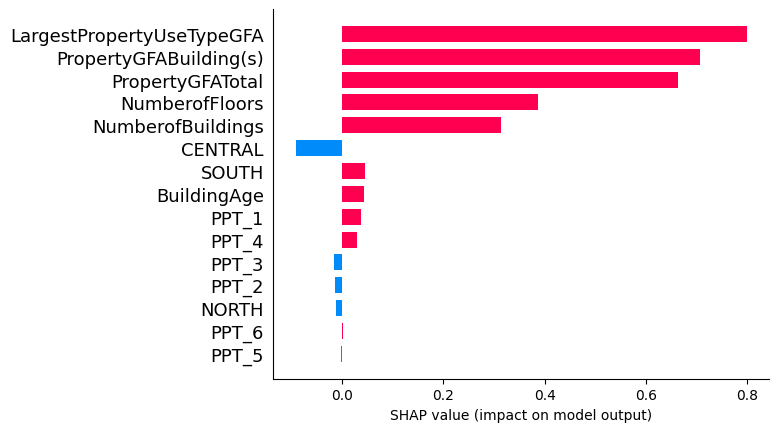

In [131]:
shap.bar_plot(explainer.shap_values(X_test.loc[198]),
              feature_names=X_test.columns,
              max_display=len(X_test.columns)
              )

### Waterfall Plot

In [132]:
explainer_wf = shap.Explainer(rf, X_test)
sv = explainer_wf(X_test)

 99%|===================| 196/197 [00:48<00:00]       

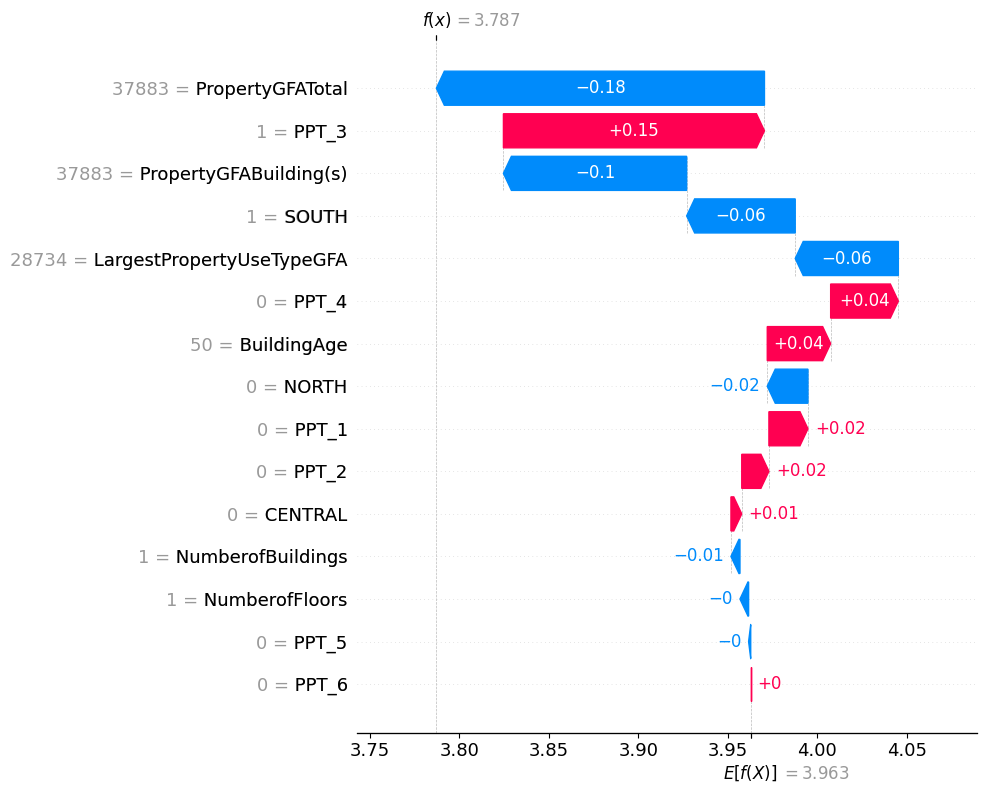

In [133]:
shap.plots.waterfall(sv[1],max_display=len(X_test.columns))

# **9. Impact of ENERGYSTARScore**

In [134]:
df_final

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,GFA1st_%,GFA2nd_%,GFA3rd_%,Steam_%,Electricity_%,Gas_%,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,100.0,NaN,NaN,28.0,55.0,18.0,7.226362e+06,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,1.0,11,103566,88502,83880.0,81.0,15.0,4.0,0.0,39.0,61.0,8.387933e+06,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,1.0,41,956110,759392,756493.0,79.0,NaN,NaN,30.0,68.0,2.0,7.258702e+07,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,90,1.0,10,61320,61320,61320.0,100.0,NaN,NaN,33.0,41.0,27.0,6.794584e+06,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,36,1.0,18,175580,113580,123445.0,70.0,39.0,0.0,0.0,38.0,62.0,1.417261e+07,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50069,87,1.0,2,24990,24990,24990.0,100.0,NaN,NaN,0.0,49.0,51.0,4.420650e+06,134.80,15.301797,4.903792,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50081,1,1.0,3,45000,45000,45728.0,102.0,0.0,NaN,0.0,100.0,0.0,1.325973e+06,9.24,14.097657,2.223542,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
50210,64,1.0,1,13661,13661,13661.0,100.0,NaN,NaN,0.0,100.0,0.0,5.026677e+05,3.50,13.127685,1.252763,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [135]:
df_score

0      60.0
1      61.0
2      43.0
3      56.0
4      75.0
       ... 
977     9.0
978    77.0
979    75.0
980    93.0
981    46.0
Name: ENERGYSTARScore, Length: 982, dtype: float64

In [136]:
df_score = df_final.join(df_score)
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 1 to 50222
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BuildingAge                982 non-null    int64  
 1   NumberofBuildings          982 non-null    float64
 2   NumberofFloors             982 non-null    int64  
 3   PropertyGFATotal           982 non-null    int64  
 4   PropertyGFABuilding(s)     982 non-null    int64  
 5   LargestPropertyUseTypeGFA  982 non-null    float64
 6   GFA1st_%                   982 non-null    float64
 7   GFA2nd_%                   492 non-null    float64
 8   GFA3rd_%                   156 non-null    float64
 9   Steam_%                    982 non-null    float64
 10  Electricity_%              982 non-null    float64
 11  Gas_%                      982 non-null    float64
 12  SiteEnergyUse(kBtu)        982 non-null    float64
 13  TotalGHGEmissions          982 non-null    float

In [137]:
df_score

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,GFA1st_%,GFA2nd_%,GFA3rd_%,Steam_%,Electricity_%,Gas_%,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH,ENERGYSTARScore
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,100.0,NaN,NaN,28.0,55.0,18.0,7.226362e+06,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,61.0
2,20,1.0,11,103566,88502,83880.0,81.0,15.0,4.0,0.0,39.0,61.0,8.387933e+06,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0
3,47,1.0,41,956110,759392,756493.0,79.0,NaN,NaN,30.0,68.0,2.0,7.258702e+07,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56.0
5,90,1.0,10,61320,61320,61320.0,100.0,NaN,NaN,33.0,41.0,27.0,6.794584e+06,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0
8,36,1.0,18,175580,113580,123445.0,70.0,39.0,0.0,0.0,38.0,62.0,1.417261e+07,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50069,87,1.0,2,24990,24990,24990.0,100.0,NaN,NaN,0.0,49.0,51.0,4.420650e+06,134.80,15.301797,4.903792,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
50081,1,1.0,3,45000,45000,45728.0,102.0,0.0,NaN,0.0,100.0,0.0,1.325973e+06,9.24,14.097657,2.223542,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
50210,64,1.0,1,13661,13661,13661.0,100.0,NaN,NaN,0.0,100.0,0.0,5.026677e+05,3.50,13.127685,1.252763,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN


In [138]:
df_score.columns

Index(['BuildingAge', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'GFA1st_%', 'GFA2nd_%', 'GFA3rd_%',
       'Steam_%', 'Electricity_%', 'Gas_%', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log',
       'PPT_1', 'PPT_2', 'PPT_3', 'PPT_4', 'PPT_5', 'PPT_6', 'CENTRAL',
       'NORTH', 'SOUTH', 'ENERGYSTARScore'],
      dtype='object')

In [139]:
order_score = ['BuildingAge', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 
       'ENERGYSTARScore',
       'PPT_1', 'PPT_2', 'PPT_3', 'PPT_4', 'PPT_5', 'PPT_6', 'CENTRAL', 'NORTH', 'SOUTH',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log']

In [140]:
df_score = df_score[order_score]

In [141]:
df_score = df_score.dropna(axis=0, how='any')
df_score

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log
OSEBuildingID,,,,,,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,61.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.226362e+06,249.98,15.793246,5.521381
2,20,1.0,11,103566,88502,83880.0,43.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.387933e+06,295.86,15.942305,5.689886
3,47,1.0,41,956110,759392,756493.0,56.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.258702e+07,2089.28,18.100297,7.644575
5,90,1.0,10,61320,61320,61320.0,27.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.794584e+06,286.43,15.731636,5.657494
8,36,1.0,18,175580,113580,123445.0,36.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.417261e+07,505.01,16.466822,6.224578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,21,1.0,1,101830,101830,130767.0,52.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.071301e+07,295.12,16.186969,5.687382
857,51,1.0,1,152365,152365,149293.0,98.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.069750e+06,13.07,13.882935,2.570320
858,106,1.0,6,320946,320946,236359.0,95.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.547131e+07,189.85,17.053063,5.246234


In [142]:
X_score=df_score.drop(columns = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log'])
Y_score=df_score['TotalGHGEmissions_log']

In [143]:
X_train_score, X_test_score, Y_train_score, Y_test_score = train_test_split(X_score, Y_score, test_size = 0.2, random_state=42)
print(f'X_train_score is in shape of {X_train_score.shape}')
print(f'X_test_score is in shape of {X_test_score.shape}')

X_train_score is in shape of (333, 16)
X_test_score is in shape of (84, 16)


In [144]:
X_train_score = X_train_score.reset_index(drop=True)
X_test_score = X_test_score.reset_index(drop=True)
Y_train_score = Y_train_score.reset_index(drop=True)
Y_test_score = Y_test_score.reset_index(drop=True)

In [145]:
X_train_score.iloc[:,0:7]

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore
0,107,1.0,6,73470,73470,47145.0,76.0
1,41,1.0,5,238148,238148,245240.0,96.0
2,45,1.0,5,88000,66400,69691.0,75.0
3,86,1.0,17,204790,174790,142034.0,63.0
4,116,1.0,4,164380,164380,123607.0,14.0
...,...,...,...,...,...,...,...
328,100,0.0,4,79600,79600,79600.0,97.0
329,30,1.0,41,589921,460489,470416.0,55.0
330,7,1.0,4,291176,191000,194674.0,87.0
331,46,1.0,1,141890,106345,168735.0,10.0


In [146]:
X_train_score.iloc[:,-9:]

,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
328,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
329,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
330,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
331,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [147]:
X_train_score_ss = ss.fit_transform(X_train_score.iloc[:,0:7])
X_test_score_ss = ss.fit_transform(X_test_score.iloc[:,0:7])
X_train_score = pd.DataFrame(X_train_score_ss).join(X_train_score.iloc[:,-9:])
X_test_score = pd.DataFrame(X_test_score_ss).join(X_test_score.iloc[:,-9:])

Y_train_score_ss = ss.fit_transform(np.array(Y_train_score).reshape(-1, 1))
Y_test_score_ss = ss.fit_transform(np.array(Y_test_score).reshape(-1, 1))

In [148]:
X_train_score

,0,1,2,3,4,5,6,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
0,1.655809,-0.066602,-0.217687,-0.563967,-0.507513,-0.600812,0.436090,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.306413,-0.066602,-0.312693,0.019191,0.155752,0.258125,1.111836,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.187491,-0.066602,-0.312693,-0.512514,-0.535988,-0.503053,0.402303,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.031466,-0.066602,0.827381,-0.098937,-0.099431,-0.189375,-0.003145,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.923385,-0.066602,-0.407699,-0.242037,-0.141359,-0.269274,-1.658724,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,1.447695,-1.545157,-0.407699,-0.542260,-0.482823,-0.460088,1.145624,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
329,-0.633450,-0.066602,3.107528,1.264889,1.051263,1.234485,-0.273444,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
330,-1.317255,-0.066602,-0.407699,0.206973,-0.034143,0.038871,0.807750,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
331,-0.157760,-0.066602,-0.692717,-0.321678,-0.375104,-0.073600,-1.793874,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [149]:
X_train_score.columns = df_score.columns[0:16]
X_test_score.columns = df_score.columns[0:16]

In [150]:
X_train_score

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
0,1.655809,-0.066602,-0.217687,-0.563967,-0.507513,-0.600812,0.436090,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.306413,-0.066602,-0.312693,0.019191,0.155752,0.258125,1.111836,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.187491,-0.066602,-0.312693,-0.512514,-0.535988,-0.503053,0.402303,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.031466,-0.066602,0.827381,-0.098937,-0.099431,-0.189375,-0.003145,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.923385,-0.066602,-0.407699,-0.242037,-0.141359,-0.269274,-1.658724,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,1.447695,-1.545157,-0.407699,-0.542260,-0.482823,-0.460088,1.145624,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
329,-0.633450,-0.066602,3.107528,1.264889,1.051263,1.234485,-0.273444,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
330,-1.317255,-0.066602,-0.407699,0.206973,-0.034143,0.038871,0.807750,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
331,-0.157760,-0.066602,-0.692717,-0.321678,-0.375104,-0.073600,-1.793874,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [151]:
#rf.best_params_

In [152]:
param_score={'bootstrap': [True],
 'max_depth': [10],
 'max_features': ['log2'],
 'n_estimators': [1000]}

In [153]:
rf_score = GridSearchCV(RandomForestRegressor(),
                       param_grid = param_score,
                       verbose = 2,
                       cv = cv_train,
                       scoring = score,
                       refit = 'neg_mean_absolute_error',
                       return_train_score = True,
                       n_jobs = -1
                      )

In [154]:
rf_score.fit(X_train_score, Y_train_score_ss)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10],
                         'max_features': ['log2'], 'n_estimators': [1000]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=('r2', 'neg_mean_absolute_error'), verbose=2)

In [155]:
Y_score_pred_rf = rf_score.predict(X_test_score)

In [156]:
mse_rf_score = metrics.mean_squared_error(Y_test_score_ss,Y_score_pred_rf)
r2_rf_score = metrics.r2_score(Y_test_score_ss,Y_score_pred_rf)
mae_rf_score = metrics.mean_absolute_error(Y_test_score_ss,Y_score_pred_rf)
print("RMSE=", mse_rf_score**(1/2), "R2=", r2_rf_score, "MAE=", mae_rf_score)

RMSE= 0.7104146686612997 R2= 0.4953109985508558 MAE= 0.5684221736310844


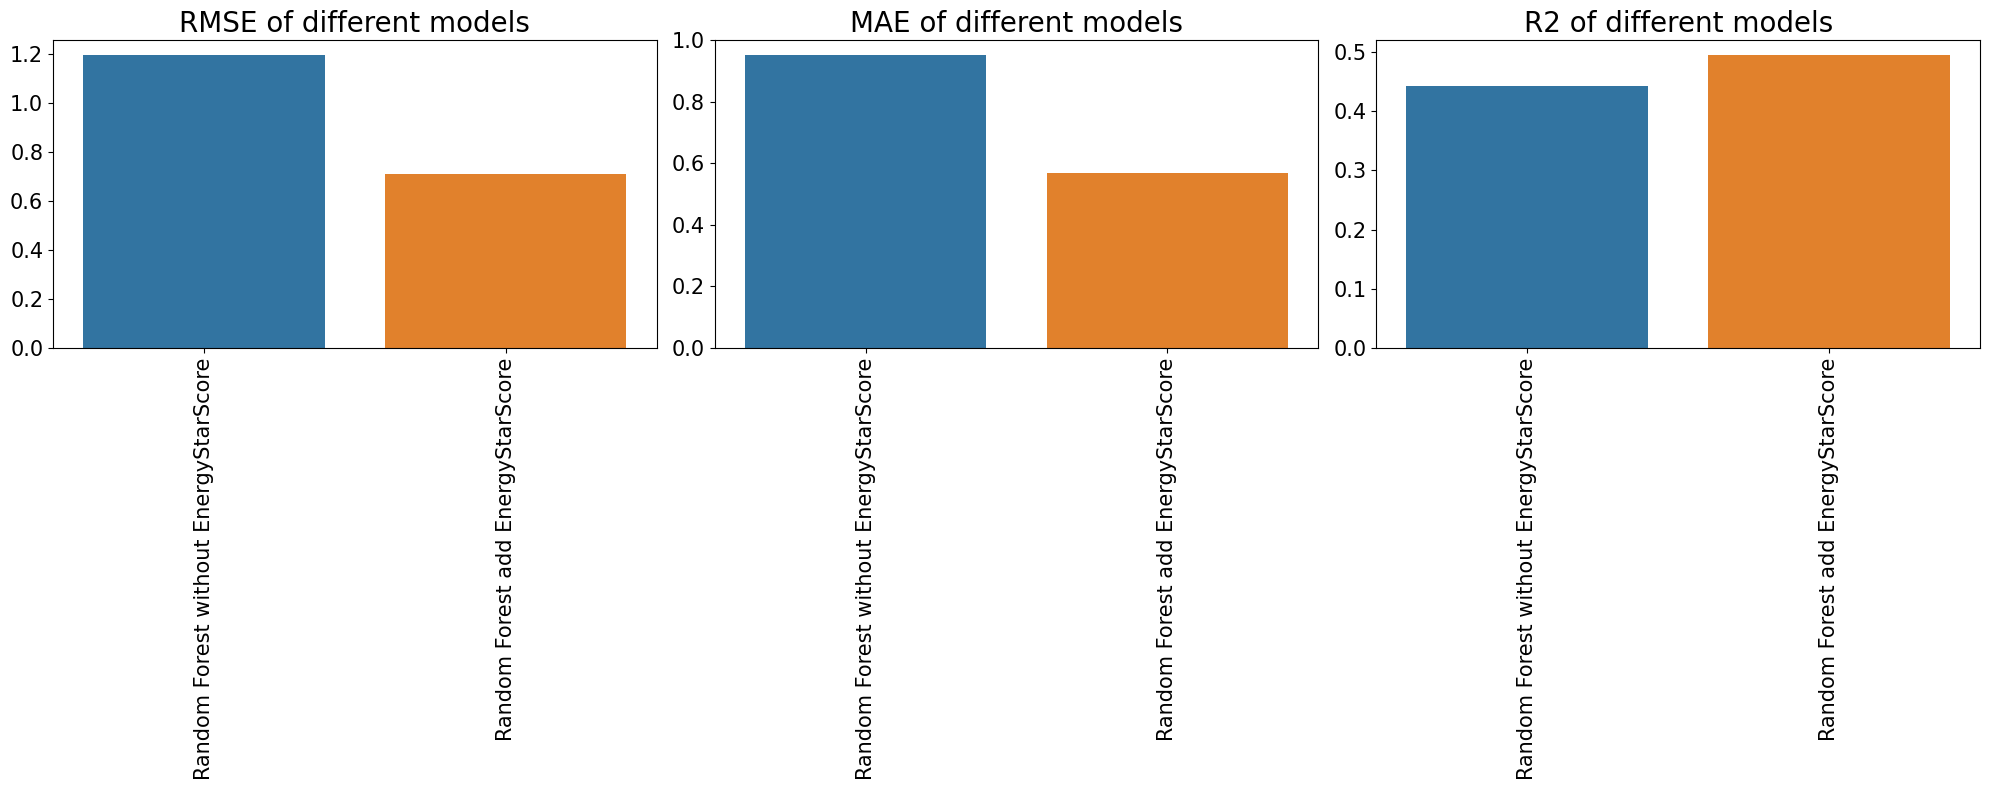

In [157]:
fig = plt.figure(figsize = (20, 8))
listeModeles = ['Random Forest without EnergyStarScore','Random Forest add EnergyStarScore']

listeMSE = [mse_rf, mse_rf_score]
listeRMSE = [i**(1/2) for i in listeMSE]

listeMAE = [mae_rf, mae_rf_score]

listeR2 = [r2_rf, r2_rf_score]

plt.subplot(1,3,1)
sns.barplot(x = listeModeles, y = listeRMSE)
plt.title('RMSE of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,3,2)
sns.barplot(x = listeModeles, y = listeMAE)
plt.title('MAE of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,3,3)
sns.barplot(x = listeModeles, y = listeR2)
plt.title('R2 of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

fig.tight_layout()
plt.show()

Random Forest with EnergyStarScore produces better modelling result.